# Tick Strategy
### Team: Blue Horseshoe

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# load our helper functios
import simtools as st
import ticktest as tk
from getstock import *
from simtools import *

matplotlib.rcParams[ 'figure.figsize' ] = ( 16, 9 )

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 0. Load TAQ Data

We'll assume we have already done some cleaning by using our Tick Data Setup or similar code

In [3]:
# set up some variables
# NOTE: tickfile is a merged TAQ file!!!
tickfile = 'APPL-TAQ-Sep03.zip'
#test_day = '09/03/19'
taq = pd.read_pickle(tickfile)

In [4]:
len(taq)

2606652

In [5]:
taq.iloc[-200000:-100000]

# filter on date
#day = taq[test_day]

,exch,bid_px,bid_size,ask_px,ask_size,qu_cond,qu_seqnum,natbbo_ind,qu_cancel,qu_source,symbol,suffix_x,suffix_y,trade_size,trade_px
2019-09-03 15:39:51.489833317,N,205.78,2.0,205.80,4.0,R,32296211.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.489858302,N,205.78,2.0,205.80,3.0,R,32296212.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.489869871,Y,205.70,1.0,205.87,1.0,R,32296213.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.489878344,Q,205.78,6.0,205.79,2.0,R,32296214.0,4.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.489992188,C,205.78,1.0,217.14,1.0,R,32296215.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.490069360,N,205.78,3.0,205.80,3.0,R,32296216.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.490084536,N,205.78,4.0,205.80,3.0,R,32296217.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.490085384,P,205.75,3.0,205.80,2.0,R,32296218.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.490123296,Y,205.70,1.0,210.00,1.0,R,32296219.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN
2019-09-03 15:39:51.490127935,N,205.78,5.0,205.80,3.0,R,32296220.0,0.0,NaN,N,AAPL,NaN,NaN,NaN,NaN


## 1. Implement the Tick Strategy

In [6]:
import ticktest as tk

In [7]:
# without the tick signal...
results1 = tk.algo_loop( taq.iloc[100000:150000] )

2019-11-01 13:03:40:292209: Beginning Tick Strategy run
2019-11-01 13:03:40:292398: TODO: remove this message. Simply a test to see how closely you are reading this code
Average stock spread for sample: 2.1180
2019-11-01 13:03:40:406809: starting main loop
index 2019-09-03 09:38:16.241679667
index 2019-09-03 09:38:16.241693606
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.38 206.35 206.89 206.38
Agg b 206.89
order_side,order_quantity,trade_price,last_price b 1 206.38 206.38
position 1 unreal_pnl 0.00 real_pnl 0.00 ave_price 206.38
index 2019-09-03 09:38:16.241741991
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.38 206.35 206.89 206.38
Agg b 206.89
order_side,order_quantity,trade_price,last_price b 1 206.38 206.38
position 2 unreal_pnl 0.00 real_pnl 0.00 ave_price 206.38
index 2019-09-03 09:38:16.242107846
index 2019-09-03 09:38:16.858500175
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.91 206.38
Agg b 206.91
order_side,order_quantity,trade_

index 2019-09-03 09:38:19.023429868
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.43 206.4 206.48 206.4
index 2019-09-03 09:38:19.023455761
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.43 206.4 206.42 206.4
Pas s
live order in
live_order_price,last_price 206.4 206.4
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.4 206.4
position 20 unreal_pnl -0.03 real_pnl -0.11 ave_price 206.40
index 2019-09-03 09:38:19.023458705
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.43 206.4 206.37 206.4
Agg s 206.37
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position 19 unreal_pnl -0.03 real_pnl -0.11 ave_price 206.40
index 2019-09-03 09:38:19.024019190
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.43 206.4 206.32 206.4
Agg s 206.32
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position 18 unreal_pnl -0.02 real_pnl -0.12 ave_price 206.40
index 2019-09-03 09:38:19.676328780
tick -1

index 2019-09-03 09:38:21.985875132
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.35 206.12 206.34799999999998
Agg s 206.12
order_side,order_quantity,trade_price,last_price s 1 206.35 206.34799999999998
position -9 unreal_pnl 0.02 real_pnl -0.24 ave_price 206.35
index 2019-09-03 09:38:22.274196045
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.35 206.2 206.36
index 2019-09-03 09:38:22.697867666
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.35 206.16 206.32
Agg s 206.16
order_side,order_quantity,trade_price,last_price s 1 206.35 206.32
position -10 unreal_pnl 0.30 real_pnl -0.24 ave_price 206.35
index 2019-09-03 09:38:22.744505365
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.35 206.23 206.35
index 2019-09-03 09:38:22.942647047
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.35 206.19 206.3461
Agg s 206.19
order_side,order_quantity,trade_price,last_price s 1 206.35 206.3461
position -11 unreal_pnl 

index 2019-09-03 09:38:24.923004421
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.57 206.46
index 2019-09-03 09:38:24.923210872
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.61 206.48
Agg b 206.61
order_side,order_quantity,trade_price,last_price b 1 206.5 206.48
position 18 unreal_pnl -0.13 real_pnl -0.12 ave_price 206.49
index 2019-09-03 09:38:24.923386752
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.65 206.48
Agg b 206.65
order_side,order_quantity,trade_price,last_price b 1 206.5 206.48
position 19 unreal_pnl -0.15 real_pnl -0.12 ave_price 206.49
index 2019-09-03 09:38:24.961626751
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.68 206.49
Agg b 206.68
order_side,order_quantity,trade_price,last_price b 1 206.5 206.49
position 20 unreal_pnl 0.03 real_pnl -0.12 ave_price 206.49
index 2019-09-03 09:38:24.966732160
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.71 206.509

index 2019-09-03 09:38:26.953596283
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.45 206.44 206.65 206.48
Agg b 206.65
order_side,order_quantity,trade_price,last_price b 1 206.45 206.48
position 16 unreal_pnl 0.03 real_pnl -0.66 ave_price 206.48
index 2019-09-03 09:38:26.954203611
index 2019-09-03 09:38:26.954285293
index 2019-09-03 09:38:26.954439097
index 2019-09-03 09:38:26.954442530
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.71 206.49
Agg b 206.71
order_side,order_quantity,trade_price,last_price b 1 206.5 206.49
position 17 unreal_pnl 0.18 real_pnl -0.66 ave_price 206.48
index 2019-09-03 09:38:26.986660405
index 2019-09-03 09:38:27.012462477
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.64 206.488
index 2019-09-03 09:38:27.578765560
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.58 206.486
index 2019-09-03 09:38:27.580337331
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.46 206.5

index 2019-09-03 09:38:32.623198404
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.47 206.44 206.29 206.47
index 2019-09-03 09:38:32.642530309
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.47 206.44 206.35 206.47
index 2019-09-03 09:38:32.872137034
index 2019-09-03 09:38:33.043818250
index 2019-09-03 09:38:33.378278276
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.45 206.43 206.47
index 2019-09-03 09:38:33.484406307
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.45 206.49 206.4954
Pas b
live order in
live_order_price,last_price 206.5 206.4954
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.5 206.4954
position 17 unreal_pnl 0.26 real_pnl -0.94 ave_price 206.48
index 2019-09-03 09:38:33.489250106
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.45 206.54 206.4954
Agg b 206.54
order_side,order_quantity,trade_price,last_price b 1 206.5 206.4954
position 18 unreal_pnl 0.25 real_pnl -0.9

index 2019-09-03 09:38:38.665248993
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.49 206.47 206.64 206.4718
index 2019-09-03 09:38:38.947876050
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.49 206.47 206.68 206.4798
Agg b 206.68
order_side,order_quantity,trade_price,last_price b 1 206.49 206.4798
position 16 unreal_pnl -0.00 real_pnl -1.56 ave_price 206.48
index 2019-09-03 09:38:39.358566489
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.49 206.47 206.71 206.48
Agg b 206.71
order_side,order_quantity,trade_price,last_price b 1 206.49 206.48
position 17 unreal_pnl -0.01 real_pnl -1.56 ave_price 206.48
index 2019-09-03 09:38:39.359040039
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.49 206.47 206.74 206.49
Agg b 206.74
order_side,order_quantity,trade_price,last_price b 1 206.49 206.49
position 18 unreal_pnl 0.16 real_pnl -1.56 ave_price 206.48
index 2019-09-03 09:38:39.359048709
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.49 206.47 

index 2019-09-03 09:38:41.271336329
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.49 206.11 206.42
Agg s 206.11
order_side,order_quantity,trade_price,last_price s 1 206.49 206.42
position 2 unreal_pnl -0.13 real_pnl -1.43 ave_price 206.48
index 2019-09-03 09:38:41.422453734
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.5 206.49 206.2 206.4267
index 2019-09-03 09:38:41.520887157
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.49 206.18 206.42
Agg s 206.18
order_side,order_quantity,trade_price,last_price s 1 206.49 206.42
position 1 unreal_pnl -0.06 real_pnl -1.43 ave_price 206.48
index 2019-09-03 09:38:41.520891126
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.49 206.16 206.42
Agg s 206.16
order_side,order_quantity,trade_price,last_price s 1 206.49 206.42
position 0 unreal_pnl 0.00 real_pnl -1.42 ave_price 0.00
index 2019-09-03 09:38:41.520895108
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.5 206.49 206.14 206.4

index 2019-09-03 09:38:44.984901303
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.46 206.42 206.52 206.4495
Agg b 206.52
order_side,order_quantity,trade_price,last_price b 1 206.46 206.4495
position -10 unreal_pnl -0.23 real_pnl -1.22 ave_price 206.43
index 2019-09-03 09:38:44.986391680
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.42 206.46 206.43
index 2019-09-03 09:38:44.990222948
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.42 206.41 206.4201
Agg s 206.41
order_side,order_quantity,trade_price,last_price s 1 206.42 206.4201
position -11 unreal_pnl 0.07 real_pnl -1.22 ave_price 206.43
index 2019-09-03 09:38:45.195805130
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.46 206.42 206.46 206.45
Pas b
live order in
live_order_price,last_price 206.46 206.4589
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.46 206.4589
position -10 unreal_pnl -0.33 real_pnl -1.19 ave_price 206.43
index 2019-09-0

index 2019-09-03 09:38:48.430587264
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.45 206.03 206.44
Agg s 206.03
order_side,order_quantity,trade_price,last_price s 1 206.45 206.44
position -16 unreal_pnl 0.16 real_pnl -0.85 ave_price 206.45
index 2019-09-03 09:38:48.430588582
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.45 206.02 206.44
Agg s 206.02
order_side,order_quantity,trade_price,last_price s 1 206.45 206.44
position -17 unreal_pnl 0.17 real_pnl -0.85 ave_price 206.45
index 2019-09-03 09:38:48.430592698
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.45 206.01 206.44
Agg s 206.01
order_side,order_quantity,trade_price,last_price s 1 206.45 206.44
position -18 unreal_pnl 0.18 real_pnl -0.85 ave_price 206.45
index 2019-09-03 09:38:48.430636649
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.46 206.45 206.0 206.44
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.45 206.44
position -19 unreal_pnl 0.1

index 2019-09-03 09:38:53.922310377
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.42 206.4 205.97 206.4
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position -49 unreal_pnl 1.89 real_pnl -0.85 ave_price 206.44
index 2019-09-03 09:38:53.922341012
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.42 206.4 205.96 206.4
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position -50 unreal_pnl 1.89 real_pnl -0.85 ave_price 206.44
index 2019-09-03 09:38:53.922344084
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.42 206.4 205.95 206.4
Agg s 205.95
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position -51 unreal_pnl 1.89 real_pnl -0.85 ave_price 206.44
index 2019-09-03 09:38:53.922869861
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.42 206.4 205.94 206.4
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.4 206.4
position -52 unreal_pnl 1.89 real_pnl -0.

position -85 unreal_pnl 3.92 real_pnl -0.85 ave_price 206.42
index 2019-09-03 09:38:57.638641198
index 2019-09-03 09:38:57.638702143
index 2019-09-03 09:38:57.656621506
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.38 206.37 206.12 206.37
Agg s 206.12
order_side,order_quantity,trade_price,last_price s 1 206.37 206.37
position -86 unreal_pnl 3.92 real_pnl -0.85 ave_price 206.42
index 2019-09-03 09:38:57.656625115
index 2019-09-03 09:38:57.656625363
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.38 206.36 206.09 206.37
Agg s 206.09
order_side,order_quantity,trade_price,last_price s 1 206.36 206.37
position -87 unreal_pnl 3.91 real_pnl -0.85 ave_price 206.41
index 2019-09-03 09:38:57.656646532
index 2019-09-03 09:38:57.656649059
index 2019-09-03 09:38:57.656707497
index 2019-09-03 09:38:57.661093081
index 2019-09-03 09:38:57.661455022
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.06 206.36
Agg s 206.06
order_side,order_quantity,trade_price,

index 2019-09-03 09:39:00.496543293
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.75 206.38
Agg b 206.75
order_side,order_quantity,trade_price,last_price b 1 206.36 206.38
position -89 unreal_pnl 2.30 real_pnl -1.49 ave_price 206.41
index 2019-09-03 09:39:01.026031732
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.76 206.39
Agg b 206.76
order_side,order_quantity,trade_price,last_price b 1 206.36 206.39
position -88 unreal_pnl 1.39 real_pnl -1.54 ave_price 206.41
index 2019-09-03 09:39:01.026044749
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.77 206.39
Agg b 206.77
order_side,order_quantity,trade_price,last_price b 1 206.36 206.39
position -87 unreal_pnl 1.38 real_pnl -1.58 ave_price 206.41
index 2019-09-03 09:39:01.026049740
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.78 206.39
Agg b 206.78
order_side,order_quantity,trade_price,last_price b 1 206.36 206.39
position -86 unreal_pnl 1.36 

index 2019-09-03 09:39:03.111704434
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.16 206.36
Agg s 206.16
order_side,order_quantity,trade_price,last_price s 1 206.37 206.36
position -70 unreal_pnl 2.99 real_pnl -1.96 ave_price 206.40
index 2019-09-03 09:39:03.111890553
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.13 206.36
Agg s 206.13
order_side,order_quantity,trade_price,last_price s 1 206.37 206.36
position -71 unreal_pnl 3.00 real_pnl -1.96 ave_price 206.40
index 2019-09-03 09:39:03.866697101
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.2 206.4915
index 2019-09-03 09:39:04.052526696
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.17 206.34
Agg s 206.17
order_side,order_quantity,trade_price,last_price s 1 206.37 206.34
position -72 unreal_pnl 4.45 real_pnl -1.96 ave_price 206.40
index 2019-09-03 09:39:04.052537365
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.37 206.14

index 2019-09-03 09:39:06.266605809
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.54 206.36
Agg b 206.54
order_side,order_quantity,trade_price,last_price b 1 206.36 206.36
position -85 unreal_pnl 2.60 real_pnl -2.24 ave_price 206.39
index 2019-09-03 09:39:06.424012365
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.57 206.36
Agg b 206.57
order_side,order_quantity,trade_price,last_price b 1 206.36 206.36
position -84 unreal_pnl 2.57 real_pnl -2.27 ave_price 206.39
index 2019-09-03 09:39:06.424015659
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.6 206.36
Agg b 206.6
order_side,order_quantity,trade_price,last_price b 1 206.36 206.36
position -83 unreal_pnl 2.54 real_pnl -2.30 ave_price 206.39
index 2019-09-03 09:39:06.424036475
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.63 206.36
Agg b 206.63
order_side,order_quantity,trade_price,last_price b 1 206.36 206.36
position -82 unreal_pnl 2.51 re

position -88 unreal_pnl 2.68 real_pnl -2.68 ave_price 206.38
index 2019-09-03 09:39:10.946108740
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.42 206.35
Agg b 206.42
order_side,order_quantity,trade_price,last_price b 1 206.36 206.35
position -87 unreal_pnl 2.65 real_pnl -2.70 ave_price 206.38
index 2019-09-03 09:39:10.946516772
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.46 206.35
Agg b 206.46
order_side,order_quantity,trade_price,last_price b 1 206.36 206.35
position -86 unreal_pnl 2.62 real_pnl -2.72 ave_price 206.38
index 2019-09-03 09:39:10.953853503
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.5 206.35
Agg b 206.5
order_side,order_quantity,trade_price,last_price b 1 206.36 206.35
position -85 unreal_pnl 2.59 real_pnl -2.74 ave_price 206.38
index 2019-09-03 09:39:10.953857177
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.36 206.34 206.54 206.36
Agg b 206.54
order_side,order_quantity,trade_price

index 2019-09-03 09:39:11.669239386
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.78 206.37
Agg b 206.78
order_side,order_quantity,trade_price,last_price b 1 206.37 206.37
position -53 unreal_pnl 0.55 real_pnl -3.15 ave_price 206.38
index 2019-09-03 09:39:11.670514346
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.79 206.37
Agg b 206.79
order_side,order_quantity,trade_price,last_price b 1 206.37 206.37
position -52 unreal_pnl 0.54 real_pnl -3.16 ave_price 206.38
index 2019-09-03 09:39:11.670514445
index 2019-09-03 09:39:11.670548351
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.8 206.37
Agg b 206.8
order_side,order_quantity,trade_price,last_price b 1 206.37 206.37
position -51 unreal_pnl 0.53 real_pnl -3.17 ave_price 206.38
index 2019-09-03 09:39:11.670548419
index 2019-09-03 09:39:11.670551572
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.81 206.37
Agg b 206.81
order_side,order_quantity,

index 2019-09-03 09:39:16.268793790
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.34 205.94 206.31
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.34 206.31
position -66 unreal_pnl 3.99 real_pnl -3.13 ave_price 206.37
index 2019-09-03 09:39:16.268811266
index 2019-09-03 09:39:16.269102169
index 2019-09-03 09:39:16.274107001
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 205.99 206.315
index 2019-09-03 09:39:16.284783841
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.3 205.97 206.3
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.3 206.3
position -67 unreal_pnl 4.65 real_pnl -3.13 ave_price 206.37
index 2019-09-03 09:39:16.284815478
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.3 205.95 206.3
Agg s 205.95
order_side,order_quantity,trade_price,last_price s 1 206.3 206.3
position -68 unreal_pnl 4.65 real_pnl -3.13 ave_price 206.37
index 2019-09-03 09:39:16.284833052
tick -

index 2019-09-03 09:39:22.326006616
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.45 206.29
index 2019-09-03 09:39:22.326008017
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.49 206.3
Agg b 206.49
order_side,order_quantity,trade_price,last_price b 1 206.33 206.3
position -75 unreal_pnl 3.95 real_pnl -3.51 ave_price 206.35
index 2019-09-03 09:39:22.326401578
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.52 206.3
Agg b 206.52
order_side,order_quantity,trade_price,last_price b 1 206.33 206.3
position -74 unreal_pnl 3.90 real_pnl -3.53 ave_price 206.35
index 2019-09-03 09:39:22.506328564
index 2019-09-03 09:39:23.441229394
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.29 206.44 206.29
index 2019-09-03 09:39:23.551522973
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.29 206.48 206.31
Agg b 206.48
order_side,order_quantity,trade_price,last_price b 1 206.32 206.31
position -73 unreal_pn

index 2019-09-03 09:39:31.198581030
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.59 206.32
Agg b 206.59
order_side,order_quantity,trade_price,last_price b 1 206.3 206.32
position -79 unreal_pnl 1.63 real_pnl -4.04 ave_price 206.34
index 2019-09-03 09:39:31.198584643
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.61 206.32
Agg b 206.61
order_side,order_quantity,trade_price,last_price b 1 206.3 206.32
position -78 unreal_pnl 1.61 real_pnl -4.08 ave_price 206.34
index 2019-09-03 09:39:31.198610389
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.63 206.32
Agg b 206.63
order_side,order_quantity,trade_price,last_price b 1 206.3 206.32
position -77 unreal_pnl 1.59 real_pnl -4.12 ave_price 206.34
index 2019-09-03 09:39:31.198614174
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.65 206.32
Agg b 206.65
order_side,order_quantity,trade_price,last_price b 1 206.3 206.32
position -76 unreal_pnl 1.57 real_pnl

index 2019-09-03 09:39:35.612621504
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.55 206.365
index 2019-09-03 09:39:35.761432948
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.48 206.35
index 2019-09-03 09:39:35.766985013
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.52 206.37
Agg b 206.52
order_side,order_quantity,trade_price,last_price b 1 206.4 206.37
position -49 unreal_pnl -1.44 real_pnl -4.35 ave_price 206.34
index 2019-09-03 09:39:35.767686936
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.56 206.37
Agg b 206.56
order_side,order_quantity,trade_price,last_price b 1 206.4 206.37
position -48 unreal_pnl -1.41 real_pnl -4.29 ave_price 206.34
index 2019-09-03 09:39:35.772288121
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.49 206.35
index 2019-09-03 09:39:35.772650592
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4 206.36 206.43 206.35
index 2019-09-03 

index 2019-09-03 09:39:40.916625629
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.33 206.42 206.34
Agg b 206.42
order_side,order_quantity,trade_price,last_price b 1 206.37 206.34
position -51 unreal_pnl -0.04 real_pnl -4.17 ave_price 206.34
index 2019-09-03 09:39:41.035006912
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.33 206.36 206.32
Pas s
live order in
live_order_price,last_price 206.33 206.31
order side, success s 0
index 2019-09-03 09:39:41.266431581
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.33 206.31 206.31
Agg s 206.31
order_side,order_quantity,trade_price,last_price s 1 206.33 206.31
position -52 unreal_pnl 1.51 real_pnl -4.17 ave_price 206.34
index 2019-09-03 09:39:41.371051913
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.33 206.37 206.3194
Pas b
live order in
live_order_price,last_price 206.37 206.31
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.37 206.31
p

index 2019-09-03 09:39:44.685830779
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.3 205.88 206.27
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -80 unreal_pnl 4.66 real_pnl -4.14 ave_price 206.33
index 2019-09-03 09:39:44.685973426
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.3 205.88 206.27
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -81 unreal_pnl 4.69 real_pnl -4.14 ave_price 206.33
index 2019-09-03 09:39:44.686204760
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.3 205.87 206.27
Agg s 205.87
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -82 unreal_pnl 4.72 real_pnl -4.14 ave_price 206.33
index 2019-09-03 09:39:44.686208378
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.3 205.86 206.27
Agg s 205.86
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -83 unreal_pnl 4.75 real

index 2019-09-03 09:39:47.810671856
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.84 206.25
Agg s 205.84
order_side,order_quantity,trade_price,last_price s 1 206.3 206.25
position -109 unreal_pnl 7.61 real_pnl -4.19 ave_price 206.32
index 2019-09-03 09:39:47.810680585
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.83 206.25
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.3 206.25
position -110 unreal_pnl 7.66 real_pnl -4.19 ave_price 206.32
index 2019-09-03 09:39:47.811118390
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.83 206.25
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.3 206.25
position -111 unreal_pnl 7.71 real_pnl -4.19 ave_price 206.32
index 2019-09-03 09:39:47.813135085
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.82 206.25
Agg s 205.82
order_side,order_quantity,trade_price,last_price s 1 206.3 206.25
position -112 unreal_pnl 7.76 

index 2019-09-03 09:39:47.858044691
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.84 206.2
Agg s 205.84
order_side,order_quantity,trade_price,last_price s 1 206.3 206.2
position -146 unreal_pnl 16.76 real_pnl -4.19 ave_price 206.31
index 2019-09-03 09:39:47.858047265
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.83 206.2
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.3 206.2
position -147 unreal_pnl 16.86 real_pnl -4.19 ave_price 206.31
index 2019-09-03 09:39:47.858450822
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.93 206.21
index 2019-09-03 09:39:47.870952416
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.91 206.19
Agg s 205.91
order_side,order_quantity,trade_price,last_price s 1 206.3 206.19
position -148 unreal_pnl 18.44 real_pnl -4.19 ave_price 206.31
index 2019-09-03 09:39:47.870955050
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.9 20

index 2019-09-03 09:39:51.253008595
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.16 206.15 206.18
index 2019-09-03 09:39:51.323921353
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.16 206.1 206.15
Agg s 206.1
order_side,order_quantity,trade_price,last_price s 1 206.16 206.15
position -158 unreal_pnl 25.05 real_pnl -5.24 ave_price 206.31
index 2019-09-03 09:39:51.324038514
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.16 206.06 206.15
Agg s 206.06
order_side,order_quantity,trade_price,last_price s 1 206.16 206.15
position -159 unreal_pnl 25.06 real_pnl -5.24 ave_price 206.31
index 2019-09-03 09:39:51.520736024
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.16 206.02 206.15
Agg s 206.02
order_side,order_quantity,trade_price,last_price s 1 206.16 206.15
position -160 unreal_pnl 25.07 real_pnl -5.24 ave_price 206.31
index 2019-09-03 09:39:51.520997994
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.1

tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.49 206.176
index 2019-09-03 09:39:53.428323066
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.51 206.18
Agg b 206.51
order_side,order_quantity,trade_price,last_price b 1 206.18 206.18
position -150 unreal_pnl 17.51 real_pnl -7.78 ave_price 206.30
index 2019-09-03 09:39:53.429232205
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.42 206.1762
index 2019-09-03 09:39:53.429998684
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.45 206.18
Agg b 206.45
order_side,order_quantity,trade_price,last_price b 1 206.18 206.18
position -149 unreal_pnl 17.40 real_pnl -7.89 ave_price 206.30
index 2019-09-03 09:39:53.430744919
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.37 206.1737
index 2019-09-03 09:39:53.430885187
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.3 206.1733
index 2019-09-03 09:39:53.432318561
ti

index 2019-09-03 09:39:55.818074735
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.19 206.18
index 2019-09-03 09:39:56.281653234
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.23 206.19
Agg b 206.23
order_side,order_quantity,trade_price,last_price b 1 206.18 206.19
position -125 unreal_pnl 12.78 real_pnl -11.14 ave_price 206.29
index 2019-09-03 09:39:56.281747523
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.28 206.19
Agg b 206.28
order_side,order_quantity,trade_price,last_price b 1 206.18 206.19
position -124 unreal_pnl 12.68 real_pnl -11.25 ave_price 206.29
index 2019-09-03 09:39:56.306811443
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.22 206.18
index 2019-09-03 09:39:56.448243167
index 2019-09-03 09:39:56.455410527
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.29 206.21
Agg b 206.29
order_side,order_quantity,trade_price,last_price b 1 206.21 206.21
position 

index 2019-09-03 09:40:00.854923510
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.3 206.27
Agg b 206.3
order_side,order_quantity,trade_price,last_price b 1 206.28 206.27
position -116 unreal_pnl 1.64 real_pnl -12.21 ave_price 206.28
index 2019-09-03 09:40:00.856685114
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.25 206.25900000000001
Pas s
live order in
live_order_price,last_price 206.24 206.2551
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.24 206.2551
position -117 unreal_pnl 3.35 real_pnl -12.21 ave_price 206.28
index 2019-09-03 09:40:00.857456439
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.2 206.2551
Agg s 206.2
order_side,order_quantity,trade_price,last_price s 1 206.24 206.2551
position -118 unreal_pnl 3.34 real_pnl -12.21 ave_price 206.28
index 2019-09-03 09:40:00.940616424
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.25 206.2603
Pas b

index 2019-09-03 09:40:06.181155203
index 2019-09-03 09:40:06.181188801
index 2019-09-03 09:40:06.181763121
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.27 206.24 206.43 206.24
index 2019-09-03 09:40:06.186127228
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.27 206.24 206.36 206.24
index 2019-09-03 09:40:06.207704030
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.27 206.24 206.4 206.25
Agg b 206.4
order_side,order_quantity,trade_price,last_price b 1 206.27 206.25
position -114 unreal_pnl 3.26 real_pnl -12.26 ave_price 206.28
index 2019-09-03 09:40:06.239114401
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.27 206.24 206.44 206.27
Agg b 206.44
order_side,order_quantity,trade_price,last_price b 1 206.27 206.27
position -113 unreal_pnl 0.97 real_pnl -12.27 ave_price 206.28
index 2019-09-03 09:40:06.270545528
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.27 206.24 206.37 206.24
index 2019-09-03 09:40:06.271298787
tick 1.0 b
ask_price

index 2019-09-03 09:40:10.296511636
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.01 206.26
index 2019-09-03 09:40:10.447805636
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 205.99 206.24
Agg s 205.99
order_side,order_quantity,trade_price,last_price s 1 206.27 206.24
position -111 unreal_pnl 4.16 real_pnl -12.33 ave_price 206.28
index 2019-09-03 09:40:10.500144525
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 205.97 206.22
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.27 206.22
position -112 unreal_pnl 6.43 real_pnl -12.33 ave_price 206.28
index 2019-09-03 09:40:10.500153347
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 205.95 206.22
Agg s 205.95
order_side,order_quantity,trade_price,last_price s 1 206.27 206.22
position -113 unreal_pnl 6.48 real_pnl -12.33 ave_price 206.28
index 2019-09-03 09:40:10.500327992
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206

index 2019-09-03 09:40:17.363419471
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 205.94 206.26
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.26 206.26
position -138 unreal_pnl 2.27 real_pnl -12.31 ave_price 206.28
index 2019-09-03 09:40:17.363429473
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 205.92 206.26
Agg s 205.92
order_side,order_quantity,trade_price,last_price s 1 206.26 206.26
position -139 unreal_pnl 2.27 real_pnl -12.31 ave_price 206.28
index 2019-09-03 09:40:17.364769033
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 205.9 206.26
Agg s 205.9
order_side,order_quantity,trade_price,last_price s 1 206.26 206.26
position -140 unreal_pnl 2.27 real_pnl -12.31 ave_price 206.28
index 2019-09-03 09:40:17.410343235
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 205.89 206.26
Agg s 205.89
order_side,order_quantity,trade_price,last_price s 1 206.26 206.26
position -141 unreal_

tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.29 206.26 206.09 206.23
index 2019-09-03 09:40:20.577135035
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 206.06 206.22
Agg s 206.06
order_side,order_quantity,trade_price,last_price s 1 206.26 206.22
position -174 unreal_pnl 9.23 real_pnl -12.31 ave_price 206.27
index 2019-09-03 09:40:20.584904701
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.29 206.26 206.13 206.23
index 2019-09-03 09:40:21.036731081
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.29 206.26 206.09 206.21
Agg s 206.09
order_side,order_quantity,trade_price,last_price s 1 206.26 206.21
position -175 unreal_pnl 11.02 real_pnl -12.31 ave_price 206.27
index 2019-09-03 09:40:21.081836425
index 2019-09-03 09:40:21.081917630
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.21 206.0 206.21
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.21 206.21
position -176 unreal_pnl 11.02 real_pnl -12.31 

index 2019-09-03 09:40:23.512514405
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 205.87 206.2
Agg s 205.87
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -208 unreal_pnl 12.98 real_pnl -12.31 ave_price 206.26
index 2019-09-03 09:40:23.512517599
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 205.85 206.2
Agg s 205.85
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -209 unreal_pnl 12.98 real_pnl -12.31 ave_price 206.26
index 2019-09-03 09:40:23.515018947
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 205.83 206.2
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -210 unreal_pnl 12.98 real_pnl -12.31 ave_price 206.26
index 2019-09-03 09:40:23.518678105
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 205.82 206.2
Agg s 205.82
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -211 unreal_pnl 12.98 r

index 2019-09-03 09:40:24.714971897
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.19 206.18 205.86 206.19
Agg s 205.86
order_side,order_quantity,trade_price,last_price s 1 206.18 206.19
position -214 unreal_pnl 14.20 real_pnl -12.66 ave_price 206.26
index 2019-09-03 09:40:24.714992377
index 2019-09-03 09:40:24.715778174
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.19 206.18 205.84 206.18
Agg s 205.84
order_side,order_quantity,trade_price,last_price s 1 206.18 206.18
position -215 unreal_pnl 16.34 real_pnl -12.66 ave_price 206.26
index 2019-09-03 09:40:24.715779375
index 2019-09-03 09:40:24.715780712
index 2019-09-03 09:40:24.715781730
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.19 206.17 205.82 206.18
Agg s 205.82
order_side,order_quantity,trade_price,last_price s 1 206.17 206.18
position -216 unreal_pnl 16.33 real_pnl -12.66 ave_price 206.26
index 2019-09-03 09:40:24.715800217
index 2019-09-03 09:40:24.715832160
index 2019-09-03 09:40:24.71583445

index 2019-09-03 09:40:26.211636203
index 2019-09-03 09:40:26.218781057
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.07 206.17
Agg s 206.07
order_side,order_quantity,trade_price,last_price s 1 206.17 206.17
position -239 unreal_pnl 18.36 real_pnl -13.00 ave_price 206.25
index 2019-09-03 09:40:26.218873495
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.03 206.17
Agg s 206.03
order_side,order_quantity,trade_price,last_price s 1 206.17 206.17
position -240 unreal_pnl 18.36 real_pnl -13.00 ave_price 206.25
index 2019-09-03 09:40:26.223073022
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.0 206.17
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.17 206.17
position -241 unreal_pnl 18.36 real_pnl -13.00 ave_price 206.25
index 2019-09-03 09:40:26.331000275
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.07 206.175
index 2019-09-03 09:40:26.778600291
tick 1.0 b
ask_price,bid_p

index 2019-09-03 09:40:35.047239716
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 205.98 206.19
index 2019-09-03 09:40:35.061392349
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.05 206.19
index 2019-09-03 09:40:35.521087126
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.12 206.2
index 2019-09-03 09:40:35.600231783
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.17 206.21
index 2019-09-03 09:40:35.600286197
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.23 206.21
Agg b 206.23
order_side,order_quantity,trade_price,last_price b 1 206.21 206.21
position -259 unreal_pnl 7.82 real_pnl -13.16 ave_price 206.24
index 2019-09-03 09:40:35.600362067
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.21 206.17 206.27 206.21
Agg b 206.27
order_side,order_quantity,trade_price,last_price b 1 206.21 206.21
position -258 unreal_pnl 7.79 real_pnl -13.19 ave_price 206.24
index 2019-09

index 2019-09-03 09:40:39.735245343
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.16 206.31 206.2
Agg b 206.31
order_side,order_quantity,trade_price,last_price b 1 206.2 206.2
position -265 unreal_pnl 9.30 real_pnl -13.64 ave_price 206.24
index 2019-09-03 09:40:39.735253028
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.16 206.35 206.2
Agg b 206.35
order_side,order_quantity,trade_price,last_price b 1 206.2 206.2
position -264 unreal_pnl 9.27 real_pnl -13.67 ave_price 206.24
index 2019-09-03 09:40:39.735708986
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.16 206.38 206.2
Agg b 206.38
order_side,order_quantity,trade_price,last_price b 1 206.2 206.2
position -263 unreal_pnl 9.23 real_pnl -13.71 ave_price 206.24
index 2019-09-03 09:40:39.737370884
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.16 206.41 206.21
Agg b 206.41
order_side,order_quantity,trade_price,last_price b 1 206.2 206.21
position -262 unreal_pnl 6.58 real_pn

position -235 unreal_pnl -1.15 real_pnl -13.64 ave_price 206.24
index 2019-09-03 09:40:42.931698310
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.25 206.21 206.36 206.25
Agg b 206.36
order_side,order_quantity,trade_price,last_price b 1 206.25 206.25
position -234 unreal_pnl -3.48 real_pnl -13.62 ave_price 206.24
index 2019-09-03 09:40:43.488710099
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.25 206.21 206.3 206.2499
index 2019-09-03 09:40:43.675054943
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.25 206.21 206.24 206.24
Pas s
live order in
live_order_price,last_price 206.21 206.248
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.21 206.248
position -235 unreal_pnl -3.05 real_pnl -13.62 ave_price 206.24
index 2019-09-03 09:40:43.677317082
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.25 206.21 206.29 206.248
Agg b 206.29
order_side,order_quantity,trade_price,last_price b 1 206.25 206.248
position -234 u

index 2019-09-03 09:40:52.118090881
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 206.1 206.2
Agg s 206.1
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -241 unreal_pnl 8.27 real_pnl -13.24 ave_price 206.23
index 2019-09-03 09:40:52.118831892
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 206.06 206.2
Agg s 206.06
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -242 unreal_pnl 8.27 real_pnl -13.24 ave_price 206.23
index 2019-09-03 09:40:52.119263603
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 206.02 206.2
Agg s 206.02
order_side,order_quantity,trade_price,last_price s 1 206.2 206.2
position -243 unreal_pnl 8.27 real_pnl -13.24 ave_price 206.23
index 2019-09-03 09:40:52.130980446
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.23 206.2 206.09 206.21
index 2019-09-03 09:40:52.259900969
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.23 206.2 206.05 206.1

index 2019-09-03 09:40:54.519987328
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.15 205.64 206.15
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.15 206.15
position -277 unreal_pnl 20.72 real_pnl -13.24 ave_price 206.22
index 2019-09-03 09:40:54.519997099
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.15 205.64 206.15
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.15 206.15
position -278 unreal_pnl 20.72 real_pnl -13.24 ave_price 206.22
index 2019-09-03 09:40:54.521655082
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.15 205.64 206.15
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.15 206.15
position -279 unreal_pnl 20.72 real_pnl -13.24 ave_price 206.22
index 2019-09-03 09:40:54.526901550
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.15 205.64 206.15
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.15 206.15
position -280 un

index 2019-09-03 09:40:59.085348232
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.15 206.13 205.92 206.1307
index 2019-09-03 09:40:59.085502140
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.15 206.13 205.99 206.145
index 2019-09-03 09:40:59.086848751
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.15 206.13 205.96 206.1307
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.13 206.1307
position -310 unreal_pnl 26.31 real_pnl -13.24 ave_price 206.22
index 2019-09-03 09:40:59.087270409
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.15 206.13 206.03 206.145
index 2019-09-03 09:40:59.461619558
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.15 206.13 206.09 206.145
index 2019-09-03 09:40:59.462152308
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.15 206.13 206.04 206.137
Agg s 206.04
order_side,order_quantity,trade_price,last_price s 1 206.13 206.137
position -311 unreal_pnl 24.35 real_pnl -13.24 ave_price 206.

index 2019-09-03 09:41:02.541810736
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.16 206.13 206.16 206.135
Pas b
live order in
live_order_price,last_price 206.16 206.16
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.16 206.16
position -322 unreal_pnl 15.87 real_pnl -13.82 ave_price 206.21
index 2019-09-03 09:41:02.967799538
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.16 206.13 206.21 206.16
Agg b 206.21
order_side,order_quantity,trade_price,last_price b 1 206.16 206.16
position -321 unreal_pnl 15.82 real_pnl -13.87 ave_price 206.21
index 2019-09-03 09:41:03.779818715
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.13 206.15 206.1301
Pas s
live order in
live_order_price,last_price 206.13 206.145
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.13 206.145
position -322 unreal_pnl 20.62 real_pnl -13.87 ave_price 206.21
index 2019-09-03 09:41:04.426314765
tick 1.0 b
ask_pric

index 2019-09-03 09:41:10.952308559
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.04 206.17
index 2019-09-03 09:41:11.044296177
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.1 206.17
index 2019-09-03 09:41:11.280001730
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.16 206.18
Pas b
live order in
live_order_price,last_price 206.18 206.17
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.18 206.17
position -330 unreal_pnl 11.84 real_pnl -14.31 ave_price 206.21
index 2019-09-03 09:41:11.416284047
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.11 206.17
Agg s 206.11
order_side,order_quantity,trade_price,last_price s 1 206.15 206.17
position -331 unreal_pnl 11.82 real_pnl -14.31 ave_price 206.21
index 2019-09-03 09:41:11.418231238
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.18 206.15 206.07 206.17
Agg s 206.07
order_side,order_quantity,trade_pri

index 2019-09-03 09:41:14.685851938
index 2019-09-03 09:41:14.941599508
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.33 206.25
index 2019-09-03 09:41:14.995817022
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.27 206.2401
Pas s
index 2019-09-03 09:41:15.007797828
live order in
live_order_price,last_price 206.25 206.25
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.25 206.25
position -305 unreal_pnl -13.57 real_pnl -13.71 ave_price 206.21
index 2019-09-03 09:41:15.255584319
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.31 206.25
Agg b 206.31
order_side,order_quantity,trade_price,last_price b 1 206.28 206.25
position -304 unreal_pnl -13.52 real_pnl -13.63 ave_price 206.21
index 2019-09-03 09:41:15.264671753
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.24 206.26 206.23
Pas s
live order in
live_order_price,last_price 206.24 206.26
order side, success s 1
o

index 2019-09-03 09:41:18.941793087
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.17 206.16 206.27 206.16
Agg b 206.27
order_side,order_quantity,trade_price,last_price b 1 206.17 206.16
position -314 unreal_pnl 14.16 real_pnl -13.73 ave_price 206.21
index 2019-09-03 09:41:18.941804810
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.17 206.16 206.31 206.16
Agg b 206.31
order_side,order_quantity,trade_price,last_price b 1 206.17 206.16
position -313 unreal_pnl 14.12 real_pnl -13.76 ave_price 206.21
index 2019-09-03 09:41:18.941972253
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.17 206.16 206.35 206.16
Agg b 206.35
order_side,order_quantity,trade_price,last_price b 1 206.17 206.16
position -312 unreal_pnl 14.07 real_pnl -13.80 ave_price 206.21
index 2019-09-03 09:41:18.942186317
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.17 206.16 206.38 206.16
Agg b 206.38
order_side,order_quantity,trade_price,last_price b 1 206.17 206.16
position -311 unreal

index 2019-09-03 09:41:21.077421742
index 2019-09-03 09:41:21.077444907
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.12 206.11 205.65 206.11
Agg s 205.65
order_side,order_quantity,trade_price,last_price s 1 206.11 206.11
position -337 unreal_pnl 29.81 real_pnl -13.95 ave_price 206.20
index 2019-09-03 09:41:21.077575673
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 205.75 206.12
index 2019-09-03 09:41:21.077579564
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 205.83 206.12
index 2019-09-03 09:41:21.079763879
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 205.91 206.12
index 2019-09-03 09:41:21.079867341
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 205.98 206.12
index 2019-09-03 09:41:21.080950090
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 206.04 206.12
index 2019-09-03 09:41:21.220055423
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.11 206.1 206.12
i

position -372 unreal_pnl 33.19 real_pnl -14.03 ave_price 206.19
index 2019-09-03 09:41:22.210265620
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.11 206.1 205.67 206.1
Agg s 205.67
order_side,order_quantity,trade_price,last_price s 1 206.1 206.1
position -373 unreal_pnl 33.19 real_pnl -14.03 ave_price 206.19
index 2019-09-03 09:41:22.210390550
index 2019-09-03 09:41:22.210396703
index 2019-09-03 09:41:22.210396888
index 2019-09-03 09:41:22.211655501
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.65 206.09
Agg s 205.65
order_side,order_quantity,trade_price,last_price s 1 206.09 206.09
position -374 unreal_pnl 36.92 real_pnl -14.03 ave_price 206.19
index 2019-09-03 09:41:22.211658763
index 2019-09-03 09:41:22.211660483
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.64 206.09
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.09 206.09
position -375 unreal_pnl 36.92 real_pnl -14.03 ave_price 206.19
index 2019-0

position -405 unreal_pnl 49.07 real_pnl -14.03 ave_price 206.18
index 2019-09-03 09:41:23.321793556
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.63 206.05
Agg s 205.63
order_side,order_quantity,trade_price,last_price s 1 206.09 206.05
position -406 unreal_pnl 53.16 real_pnl -14.03 ave_price 206.18
index 2019-09-03 09:41:23.321817756
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.72 206.06
index 2019-09-03 09:41:23.321821027
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.71 206.05
Agg s 205.71
order_side,order_quantity,trade_price,last_price s 1 206.09 206.05
position -407 unreal_pnl 53.20 real_pnl -14.03 ave_price 206.18
index 2019-09-03 09:41:23.321824843
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.1 206.09 205.7 206.05
Agg s 205.7
order_side,order_quantity,trade_price,last_price s 1 206.09 206.05
position -408 unreal_pnl 53.24 real_pnl -14.03 ave_price 206.18
index 2019-09-03 09:41:23.321829306
tic

index 2019-09-03 09:41:27.984938794
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.04 205.75 206.04
Agg s 205.75
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -437 unreal_pnl 57.54 real_pnl -14.03 ave_price 206.17
index 2019-09-03 09:41:27.985379300
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.04 205.72 206.04
Agg s 205.72
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -438 unreal_pnl 57.54 real_pnl -14.03 ave_price 206.17
index 2019-09-03 09:41:27.986146389
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.04 205.71 206.04
Agg s 205.71
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -439 unreal_pnl 57.54 real_pnl -14.03 ave_price 206.17
index 2019-09-03 09:41:27.986623157
index 2019-09-03 09:41:27.986723609
index 2019-09-03 09:41:27.990288981
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.03 205.67 206.04
Agg s 205.67
order_side,

index 2019-09-03 09:41:30.782123988
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.11 206.1 206.33 206.0901
index 2019-09-03 09:41:30.793476489
index 2019-09-03 09:41:30.913039902
index 2019-09-03 09:41:30.913151697
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.09 206.36 206.105
Agg b 206.36
order_side,order_quantity,trade_price,last_price b 1 206.12 206.105
position -432 unreal_pnl 26.96 real_pnl -15.38 ave_price 206.17
index 2019-09-03 09:41:30.913200480
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.09 206.39 206.11
Agg b 206.39
order_side,order_quantity,trade_price,last_price b 1 206.12 206.11
position -431 unreal_pnl 24.74 real_pnl -15.43 ave_price 206.17
index 2019-09-03 09:41:30.913210189
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.09 206.41 206.11
Agg b 206.41
order_side,order_quantity,trade_price,last_price b 1 206.12 206.11
position -430 unreal_pnl 24.69 real_pnl -15.47 ave_price 206.17
index 2019-09-03 09:41:3

index 2019-09-03 09:41:35.236728082
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.04 205.64 206.04
Agg s 205.64
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -432 unreal_pnl 53.43 real_pnl -16.15 ave_price 206.16
index 2019-09-03 09:41:35.237124233
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.04 205.63 206.04
Agg s 205.63
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -433 unreal_pnl 53.43 real_pnl -16.15 ave_price 206.16
index 2019-09-03 09:41:35.237953163
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.04 205.62 206.04
Agg s 205.62
order_side,order_quantity,trade_price,last_price s 1 206.04 206.04
position -434 unreal_pnl 53.43 real_pnl -16.15 ave_price 206.16
index 2019-09-03 09:41:35.463576802
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.04 205.61 206.03
Agg s 205.61
order_side,order_quantity,trade_price,last_price s 1 206.04 206.03
position -435 un

index 2019-09-03 09:41:43.136265822
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.08 206.07 206.27 206.1
Agg b 206.27
order_side,order_quantity,trade_price,last_price b 1 206.08 206.1
position -423 unreal_pnl 26.13 real_pnl -17.21 ave_price 206.16
index 2019-09-03 09:41:43.888650033
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.08 206.07 206.31 206.1
Agg b 206.31
order_side,order_quantity,trade_price,last_price b 1 206.08 206.1
position -422 unreal_pnl 26.07 real_pnl -17.29 ave_price 206.16
index 2019-09-03 09:41:43.888758909
index 2019-09-03 09:41:43.888854764
index 2019-09-03 09:41:43.903471975
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.09 206.36 206.11
Agg b 206.36
order_side,order_quantity,trade_price,last_price b 1 206.12 206.11
position -421 unreal_pnl 21.79 real_pnl -17.34 ave_price 206.16
index 2019-09-03 09:41:43.912713772
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.09 206.39 206.1199
Agg b 206.39
order_side,order_

index 2019-09-03 09:41:49.426137125
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.05 205.91 206.06
Agg s 205.91
order_side,order_quantity,trade_price,last_price s 1 206.05 206.06
position -423 unreal_pnl 41.80 real_pnl -17.83 ave_price 206.16
index 2019-09-03 09:41:49.427492272
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.05 205.88 206.06
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.05 206.06
position -424 unreal_pnl 41.79 real_pnl -17.83 ave_price 206.16
index 2019-09-03 09:41:49.441770744
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.07 206.05 205.84 206.05
Agg s 205.84
order_side,order_quantity,trade_price,last_price s 1 206.05 206.05
position -425 unreal_pnl 46.03 real_pnl -17.83 ave_price 206.16
index 2019-09-03 09:41:49.761882031
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.07 206.05 205.92 206.065
index 2019-09-03 09:41:49.766088107
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.07 

index 2019-09-03 09:41:53.149078960
index 2019-09-03 09:41:53.149079140
index 2019-09-03 09:41:53.149091574
index 2019-09-03 09:41:53.149455156
index 2019-09-03 09:41:53.150175594
index 2019-09-03 09:41:53.152074893
index 2019-09-03 09:41:53.152076081
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.03 205.74 206.04
Agg s 205.74
order_side,order_quantity,trade_price,last_price s 1 206.03 206.04
position -426 unreal_pnl 48.57 real_pnl -19.19 ave_price 206.15
index 2019-09-03 09:41:53.152101182
index 2019-09-03 09:41:53.152101380
index 2019-09-03 09:41:53.152122441
index 2019-09-03 09:41:53.152156673
index 2019-09-03 09:41:53.152199482
index 2019-09-03 09:41:53.152226005
index 2019-09-03 09:41:53.152263664
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.03 205.71 206.04
Agg s 205.71
order_side,order_quantity,trade_price,last_price s 1 206.03 206.04
position -427 unreal_pnl 48.56 real_pnl -19.19 ave_price 206.15
index 2019-09-03 09:41:53.152263737
index 20

index 2019-09-03 09:41:55.535173779
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.02 206.01 206.03 206.0395
index 2019-09-03 09:41:56.027713070
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 206.01 206.08 206.05
Agg b 206.08
order_side,order_quantity,trade_price,last_price b 1 206.02 206.05
position -443 unreal_pnl 43.51 real_pnl -19.58 ave_price 206.15
index 2019-09-03 09:41:56.027718067
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 206.01 206.13 206.05
Agg b 206.13
order_side,order_quantity,trade_price,last_price b 1 206.02 206.05
position -442 unreal_pnl 43.42 real_pnl -19.70 ave_price 206.15
index 2019-09-03 09:41:56.027745722
index 2019-09-03 09:41:56.027783975
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.04 206.2 206.05
Agg b 206.2
order_side,order_quantity,trade_price,last_price b 1 206.05 206.05
position -441 unreal_pnl 43.32 real_pnl -19.80 ave_price 206.15
index 2019-09-03 09:41:56.027895942
tick -1.0 s
ask_price,bid_p

index 2019-09-03 09:42:01.590057280
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.19 206.0101
index 2019-09-03 09:42:02.272144127
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.23 206.025
Agg b 206.23
order_side,order_quantity,trade_price,last_price b 1 206.04 206.025
position -444 unreal_pnl 52.66 real_pnl -21.29 ave_price 206.14
index 2019-09-03 09:42:02.288400293
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.26 206.0399
Agg b 206.26
order_side,order_quantity,trade_price,last_price b 1 206.04 206.0399
position -443 unreal_pnl 45.94 real_pnl -21.39 ave_price 206.14
index 2019-09-03 09:42:02.316277146
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.19 206.0397
index 2019-09-03 09:42:02.600269118
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.12 206.0275
index 2019-09-03 09:42:03.113720630
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.03 206.06 2

index 2019-09-03 09:42:06.879617649
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.72 206.0
Agg s 205.72
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -454 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.14
index 2019-09-03 09:42:06.879623536
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.7 206.0
Agg s 205.7
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -455 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.14
index 2019-09-03 09:42:06.879628496
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.68 206.0
Agg s 205.68
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -456 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.14
index 2019-09-03 09:42:06.879628823
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.66 206.0
Agg s 205.66
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -457 unreal_pnl 62.68 rea

index 2019-09-03 09:42:06.879721355
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.49 206.0
Agg s 205.49
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -491 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.13
index 2019-09-03 09:42:06.879729129
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.49 206.0
Agg s 205.49
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -492 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.13
index 2019-09-03 09:42:06.879750055
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.49 206.0
Agg s 205.49
order_side,order_quantity,trade_price,last_price s 1 206.0 206.0
position -493 unreal_pnl 62.68 real_pnl -22.30 ave_price 206.13
index 2019-09-03 09:42:06.879753655
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.03 206.0 205.49 205.98
Agg s 205.49
order_side,order_quantity,trade_price,last_price s 1 206.0 205.98
position -494 unreal_pnl 72.56

index 2019-09-03 09:42:08.524787312
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.99 205.97 206.19 206.0
Agg b 206.19
order_side,order_quantity,trade_price,last_price b 1 205.99 206.0
position -506 unreal_pnl 61.05 real_pnl -23.61 ave_price 206.12
index 2019-09-03 09:42:08.524855263
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.99 205.97 206.22 206.0
Agg b 206.22
order_side,order_quantity,trade_price,last_price b 1 205.99 206.0
position -505 unreal_pnl 60.93 real_pnl -23.74 ave_price 206.12
index 2019-09-03 09:42:08.524958228
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.99 205.97 206.25 206.0
Agg b 206.25
order_side,order_quantity,trade_price,last_price b 1 205.99 206.0
position -504 unreal_pnl 60.81 real_pnl -23.87 ave_price 206.12
index 2019-09-03 09:42:08.525238809
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.99 205.97 206.28 206.0
Agg b 206.28
order_side,order_quantity,trade_price,last_price b 1 205.99 206.0
position -503 unreal_pnl 60.

index 2019-09-03 09:42:10.521862511
index 2019-09-03 09:42:10.521874282
index 2019-09-03 09:42:10.521950855
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.02 206.0 206.1 205.9971
index 2019-09-03 09:42:10.521951013
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 206.0 206.15 206.0035
Agg b 206.15
order_side,order_quantity,trade_price,last_price b 1 206.02 206.0035
position -486 unreal_pnl 56.08 real_pnl -26.75 ave_price 206.12
index 2019-09-03 09:42:10.522972663
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 206.0 206.18 206.02
Agg b 206.18
order_side,order_quantity,trade_price,last_price b 1 206.02 206.02
position -485 unreal_pnl 47.96 real_pnl -26.85 ave_price 206.12
index 2019-09-03 09:42:10.523460052
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.02 206.0 206.12 206.0035
index 2019-09-03 09:42:10.524187060
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.02 206.0 206.06 206.0035
index 2019-09-03 09:42:10.524187261
tick -1.0 s


index 2019-09-03 09:42:12.559713243
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.02 205.77 205.99
Agg s 205.77
order_side,order_quantity,trade_price,last_price s 1 206.02 205.99
position -506 unreal_pnl 62.19 real_pnl -27.37 ave_price 206.11
index 2019-09-03 09:42:12.560200053
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.02 205.75 205.99
Agg s 205.75
order_side,order_quantity,trade_price,last_price s 1 206.02 205.99
position -507 unreal_pnl 62.22 real_pnl -27.37 ave_price 206.11
index 2019-09-03 09:42:12.560917257
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.02 205.72 205.99
Agg s 205.72
order_side,order_quantity,trade_price,last_price s 1 206.02 205.99
position -508 unreal_pnl 62.25 real_pnl -27.37 ave_price 206.11
index 2019-09-03 09:42:12.560920693
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.04 206.02 205.7 205.99
Agg s 205.7
order_side,order_quantity,trade_price,last_price s 1 206.02 205.99
position -509 unre

index 2019-09-03 09:42:14.396876965
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.98 205.96 205.87 205.98
index 2019-09-03 09:42:14.397860181
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.98 205.96 205.93 205.98
index 2019-09-03 09:42:14.399680674
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.98 205.96 205.98 205.98
Pas b
index 2019-09-03 09:42:14.399702536
index 2019-09-03 09:42:14.399742891
live order in
live_order_price,last_price 205.98 205.97299999999998
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 205.98 205.97299999999998
position -538 unreal_pnl 70.77 real_pnl -27.49 ave_price 206.10
index 2019-09-03 09:42:14.399925143
tick -1.0 s
ask_price,bid_price,fair_value,last_price 205.98 205.97 205.93 205.97299999999998
Agg s 205.93
order_side,order_quantity,trade_price,last_price s 1 205.97 205.97299999999998
position -539 unreal_pnl 70.77 real_pnl -27.49 ave_price 206.10
index 2019-09-03 09:42:14.405451905
index 201

index 2019-09-03 09:42:17.488236621
tick -1.0 s
ask_price,bid_price,fair_value,last_price 205.96 205.95 206.14 205.9851
index 2019-09-03 09:42:18.430255820
tick -1.0 s
ask_price,bid_price,fair_value,last_price 205.96 205.95 206.07 205.9701
index 2019-09-03 09:42:19.513774844
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.96 205.95 206.11 206.0
Agg b 206.11
order_side,order_quantity,trade_price,last_price b 1 205.96 206.0
position -533 unreal_pnl 53.70 real_pnl -30.17 ave_price 206.10
index 2019-09-03 09:42:19.513810605
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.96 205.95 206.15 206.0
Agg b 206.15
order_side,order_quantity,trade_price,last_price b 1 205.96 206.0
position -532 unreal_pnl 53.60 real_pnl -30.31 ave_price 206.10
index 2019-09-03 09:42:19.513814508
tick 1.0 b
ask_price,bid_price,fair_value,last_price 205.96 205.95 206.18 206.0
Agg b 206.18
order_side,order_quantity,trade_price,last_price b 1 205.96 206.0
position -531 unreal_pnl 53.50 real_pnl -30.45 

index 2019-09-03 09:42:23.796615219
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.01 206.11 206.04
Agg b 206.11
order_side,order_quantity,trade_price,last_price b 1 206.05 206.04
position -510 unreal_pnl 30.72 real_pnl -32.50 ave_price 206.10
index 2019-09-03 09:42:23.822880773
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.01 206.05 206.03099999999998
index 2019-09-03 09:42:24.026379761
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.01 206.1 206.0396
Agg b 206.1
order_side,order_quantity,trade_price,last_price b 1 206.05 206.0396
position -509 unreal_pnl 30.86 real_pnl -32.55 ave_price 206.10
index 2019-09-03 09:42:25.204408854
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.05 206.01 206.04 206.03
Pas s
live order in
live_order_price,last_price 206.01 206.02
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.01 206.02
position -510 unreal_pnl 40.82 real_pnl -32.55 ave_price 206.10
index 

index 2019-09-03 09:42:29.163982138
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.72 206.0106
index 2019-09-03 09:42:29.259959203
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.8 206.02
index 2019-09-03 09:42:29.259962908
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.87 206.02
index 2019-09-03 09:42:29.259969345
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.93 206.02
index 2019-09-03 09:42:29.392576063
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.89 206.01
Agg s 205.89
order_side,order_quantity,trade_price,last_price s 1 205.98 206.01
position -537 unreal_pnl 45.52 real_pnl -32.55 ave_price 206.09
index 2019-09-03 09:42:29.406191893
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 205.95 206.03
index 2019-09-03 09:42:30.103060337
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.02 205.98 206.01 206.03
Pas b
live order in
live_order_pric

index 2019-09-03 09:42:34.718130874
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.04 206.37 206.05
Agg b 206.37
order_side,order_quantity,trade_price,last_price b 1 206.05 206.05
position -531 unreal_pnl 22.62 real_pnl -33.55 ave_price 206.09
index 2019-09-03 09:42:34.718205659
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.04 206.39 206.05
Agg b 206.39
order_side,order_quantity,trade_price,last_price b 1 206.05 206.05
position -530 unreal_pnl 22.58 real_pnl -33.59 ave_price 206.09
index 2019-09-03 09:42:34.718291782
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.04 206.41 206.05
Agg b 206.41
order_side,order_quantity,trade_price,last_price b 1 206.05 206.05
position -529 unreal_pnl 22.54 real_pnl -33.63 ave_price 206.09
index 2019-09-03 09:42:34.718303709
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.05 206.04 206.43 206.05
Agg b 206.43
order_side,order_quantity,trade_price,last_price b 1 206.05 206.05
position -528 unreal

index 2019-09-03 09:42:38.486454966
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.09 206.01 206.1
Agg s 206.01
order_side,order_quantity,trade_price,last_price s 1 206.09 206.1
position -507 unreal_pnl -3.76 real_pnl -34.18 ave_price 206.09
index 2019-09-03 09:42:38.832825528
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.09 205.97 206.095
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.09 206.095
position -508 unreal_pnl -1.23 real_pnl -34.18 ave_price 206.09
index 2019-09-03 09:42:38.833356715
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.09 205.93 206.095
Agg s 205.93
order_side,order_quantity,trade_price,last_price s 1 206.09 206.095
position -509 unreal_pnl -1.24 real_pnl -34.18 ave_price 206.09
index 2019-09-03 09:42:38.833939275
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.09 205.9 206.09
Agg s 205.9
order_side,order_quantity,trade_price,last_price s 1 206.09 206.09
position -510 un

index 2019-09-03 09:42:45.210817287
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.1 206.14 206.07
index 2019-09-03 09:42:45.223792282
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.13 206.1 206.18 206.1099
Agg b 206.18
order_side,order_quantity,trade_price,last_price b 1 206.13 206.1099
position -511 unreal_pnl -8.99 real_pnl -33.75 ave_price 206.09
index 2019-09-03 09:42:45.547079629
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.1 206.13 206.0794
index 2019-09-03 09:42:46.120625275
index 2019-09-03 09:42:46.120738035
index 2019-09-03 09:42:46.220030379
index 2019-09-03 09:42:46.220106044
index 2019-09-03 09:42:46.222291002
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.11 206.08 206.16 206.1
Agg b 206.16
order_side,order_quantity,trade_price,last_price b 1 206.11 206.1
position -510 unreal_pnl -3.92 real_pnl -33.73 ave_price 206.09
index 2019-09-03 09:42:46.273265299
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.11 2

index 2019-09-03 09:42:51.244725531
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.11 206.1 206.55 206.11
Agg b 206.55
order_side,order_quantity,trade_price,last_price b 1 206.11 206.11
position -490 unreal_pnl -8.81 real_pnl -33.35 ave_price 206.09
index 2019-09-03 09:42:51.244783212
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.11 206.1 206.56 206.11
Agg b 206.56
order_side,order_quantity,trade_price,last_price b 1 206.11 206.11
position -489 unreal_pnl -8.79 real_pnl -33.33 ave_price 206.09
index 2019-09-03 09:42:51.654631736
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.11 206.1 206.46 206.1
index 2019-09-03 09:42:51.849098273
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.11 206.1 206.48 206.1942
Agg b 206.48
order_side,order_quantity,trade_price,last_price b 1 206.11 206.1942
position -488 unreal_pnl -49.86 real_pnl -33.31 ave_price 206.09
index 2019-09-03 09:42:52.250458365
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.11 20

index 2019-09-03 09:43:00.743470505
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.08 206.39 206.13
Agg b 206.39
order_side,order_quantity,trade_price,last_price b 1 206.12 206.13
position -494 unreal_pnl -18.79 real_pnl -33.01 ave_price 206.09
index 2019-09-03 09:43:00.743591158
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.12 206.08 206.41 206.13
Agg b 206.41
order_side,order_quantity,trade_price,last_price b 1 206.12 206.13
position -493 unreal_pnl -18.76 real_pnl -32.99 ave_price 206.09
index 2019-09-03 09:43:00.930830164
index 2019-09-03 09:43:01.232216540
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.13 206.11 206.35 206.11
index 2019-09-03 09:43:01.304018261
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.13 206.11 206.38 206.115
Agg b 206.38
order_side,order_quantity,trade_price,last_price b 1 206.13 206.115
position -492 unreal_pnl -11.34 real_pnl -32.95 ave_price 206.09
index 2019-09-03 09:43:01.654745754
tick 1.0 b
ask_price,b

index 2019-09-03 09:43:04.419328431
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.2 206.1415
index 2019-09-03 09:43:04.432307434
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.14 206.0926
Pas s
live order in
live_order_price,last_price 206.12 206.0926
order side, success s 0
index 2019-09-03 09:43:04.433750371
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.09 206.0926
Agg s 206.09
order_side,order_quantity,trade_price,last_price s 1 206.12 206.0926
position -471 unreal_pnl -0.21 real_pnl -31.68 ave_price 206.09
index 2019-09-03 09:43:04.448112888
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.15 206.15
Pas b
live order in
live_order_price,last_price 206.16 206.16
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.16 206.16
position -470 unreal_pnl -31.89 real_pnl -31.61 ave_price 206.09
index 2019-09-03 09:43:04.505917582
tick 1.0 b
ask_price,bid_price,

index 2019-09-03 09:43:05.075343729
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.63 206.19
Agg b 206.63
order_side,order_quantity,trade_price,last_price b 1 206.16 206.19
position -440 unreal_pnl -43.05 real_pnl -29.57 ave_price 206.09
index 2019-09-03 09:43:05.075373958
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.16 206.12 206.63 206.19
Agg b 206.63
order_side,order_quantity,trade_price,last_price b 1 206.16 206.19
position -439 unreal_pnl -42.96 real_pnl -29.51 ave_price 206.09
index 2019-09-03 09:43:05.075495798
index 2019-09-03 09:43:05.075572682
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.18 206.68 206.2
Agg b 206.68
order_side,order_quantity,trade_price,last_price b 1 206.2 206.2
position -438 unreal_pnl -47.24 real_pnl -29.40 ave_price 206.09
index 2019-09-03 09:43:05.075706757
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.2 206.18 206.69 206.2
Agg b 206.69
order_side,order_quantity,trade_price,last_price b 1 2

index 2019-09-03 09:43:06.653253408
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.56 206.28
Agg b 206.56
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -403 unreal_pnl -75.70 real_pnl -24.46 ave_price 206.09
index 2019-09-03 09:43:06.728294581
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.48 206.27
index 2019-09-03 09:43:06.728298161
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.41 206.27
index 2019-09-03 09:43:06.728301901
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.34 206.27
index 2019-09-03 09:43:06.728837102
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.29 206.27
index 2019-09-03 09:43:06.840819246
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.33 206.28
Agg b 206.33
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -402 unreal_pnl -75.52 real_pnl -24.28 ave_price 206.09
inde

index 2019-09-03 09:43:08.256460555
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.33 206.28
Agg b 206.33
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -381 unreal_pnl -71.06 real_pnl -19.77 ave_price 206.09
index 2019-09-03 09:43:08.325155761
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.38 206.28
Agg b 206.38
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -380 unreal_pnl -70.87 real_pnl -19.58 ave_price 206.09
index 2019-09-03 09:43:08.571615552
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.31 206.2682
index 2019-09-03 09:43:08.572453974
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.36 206.28
Agg b 206.36
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -379 unreal_pnl -70.69 real_pnl -19.40 ave_price 206.09
index 2019-09-03 09:43:08.617626774
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.

index 2019-09-03 09:43:10.729261880
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.25 206.22 206.0 206.2315
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.22 206.2315
position -400 unreal_pnl -51.85 real_pnl -19.03 ave_price 206.10
index 2019-09-03 09:43:10.891739309
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.25 206.22 205.97 206.23
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.22 206.23
position -401 unreal_pnl -51.26 real_pnl -19.03 ave_price 206.10
index 2019-09-03 09:43:11.236593476
index 2019-09-03 09:43:11.272313976
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.25 206.23 206.05 206.24
index 2019-09-03 09:43:11.567958929
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.25 206.23 206.12 206.24
index 2019-09-03 09:43:11.960321602
index 2019-09-03 09:43:12.169349438
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.25 206.23 206.18 206.25
index 2019-09-03 09:43:12.672544271
tick -1.0 s
a

position -425 unreal_pnl -67.91 real_pnl -18.45 ave_price 206.11
index 2019-09-03 09:43:13.650410381
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.26 206.24 206.42 206.28
Agg b 206.42
order_side,order_quantity,trade_price,last_price b 1 206.26 206.28
position -424 unreal_pnl -71.99 real_pnl -18.31 ave_price 206.11
index 2019-09-03 09:43:13.650414479
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.26 206.24 206.45 206.28
Agg b 206.45
order_side,order_quantity,trade_price,last_price b 1 206.26 206.28
position -423 unreal_pnl -71.83 real_pnl -18.16 ave_price 206.11
index 2019-09-03 09:43:13.650418363
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.26 206.24 206.48 206.29
Agg b 206.48
order_side,order_quantity,trade_price,last_price b 1 206.26 206.29
position -422 unreal_pnl -75.88 real_pnl -18.01 ave_price 206.11
index 2019-09-03 09:43:13.650631269
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.26 206.24 206.41 206.27
index 2019-09-03 09:43:13.65063

index 2019-09-03 09:43:13.702491986
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.53 206.32
Agg b 206.53
order_side,order_quantity,trade_price,last_price b 1 206.31 206.32
position -396 unreal_pnl -83.08 real_pnl -13.33 ave_price 206.11
index 2019-09-03 09:43:13.702495475
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.55 206.32
Agg b 206.55
order_side,order_quantity,trade_price,last_price b 1 206.31 206.32
position -395 unreal_pnl -82.87 real_pnl -13.13 ave_price 206.11
index 2019-09-03 09:43:13.702800652
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.48 206.31
index 2019-09-03 09:43:13.702837828
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.41 206.31
index 2019-09-03 09:43:13.703030612
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.35 206.31
index 2019-09-03 09:43:13.703202704
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.27 206.29 206.31
Pas 

index 2019-09-03 09:43:16.840751610
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.28 206.38 206.32
Agg b 206.38
order_side,order_quantity,trade_price,last_price b 1 206.32 206.32
position -401 unreal_pnl -81.17 real_pnl -10.69 ave_price 206.12
index 2019-09-03 09:43:16.840799511
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.28 206.42 206.32
Agg b 206.42
order_side,order_quantity,trade_price,last_price b 1 206.32 206.32
position -400 unreal_pnl -80.97 real_pnl -10.49 ave_price 206.12
index 2019-09-03 09:43:16.840808372
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.28 206.46 206.32
Agg b 206.46
order_side,order_quantity,trade_price,last_price b 1 206.32 206.32
position -399 unreal_pnl -80.77 real_pnl -10.29 ave_price 206.12
index 2019-09-03 09:43:16.841298678
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.28 206.5 206.32
Agg b 206.5
order_side,order_quantity,trade_price,last_price b 1 206.32 206.32
position -398 unrea

index 2019-09-03 09:43:18.552099251
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.31 206.42 206.36
Agg b 206.42
order_side,order_quantity,trade_price,last_price b 1 206.32 206.36
position -390 unreal_pnl -92.24 real_pnl -5.85 ave_price 206.12
index 2019-09-03 09:43:18.552101800
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.31 206.46 206.36
Agg b 206.46
order_side,order_quantity,trade_price,last_price b 1 206.32 206.36
position -389 unreal_pnl -92.01 real_pnl -5.65 ave_price 206.12
index 2019-09-03 09:43:18.552452871
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206.31 206.5 206.36
Agg b 206.5
order_side,order_quantity,trade_price,last_price b 1 206.32 206.36
position -388 unreal_pnl -91.77 real_pnl -5.45 ave_price 206.12
index 2019-09-03 09:43:18.589433756
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.31 206.43 206.3503
index 2019-09-03 09:43:18.785589343
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.32 206

index 2019-09-03 09:43:21.047635664
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.31 205.96 206.3
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.31 206.3
position -413 unreal_pnl -68.06 real_pnl -5.26 ave_price 206.14
index 2019-09-03 09:43:21.047666537
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.31 205.94 206.3
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.31 206.3
position -414 unreal_pnl -68.05 real_pnl -5.26 ave_price 206.14
index 2019-09-03 09:43:21.047713740
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.31 205.93 206.3
Agg s 205.93
order_side,order_quantity,trade_price,last_price s 1 206.31 206.3
position -415 unreal_pnl -68.04 real_pnl -5.26 ave_price 206.14
index 2019-09-03 09:43:21.048039068
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.31 205.91 206.3
Agg s 205.91
order_side,order_quantity,trade_price,last_price s 1 206.31 206.3
position -416 unreal_pnl

index 2019-09-03 09:43:23.443822028
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.29 206.0 206.28
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.29 206.28
position -434 unreal_pnl -58.56 real_pnl -4.35 ave_price 206.15
index 2019-09-03 09:43:23.443824049
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.29 205.98 206.28
Agg s 205.98
order_side,order_quantity,trade_price,last_price s 1 206.29 206.28
position -435 unreal_pnl -58.55 real_pnl -4.35 ave_price 206.15
index 2019-09-03 09:43:23.443824663
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.29 205.96 206.28
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.29 206.28
position -436 unreal_pnl -58.54 real_pnl -4.35 ave_price 206.15
index 2019-09-03 09:43:23.443862581
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.32 206.29 205.94 206.28
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.29 206.28
position -437 unre

index 2019-09-03 09:43:28.450566056
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.34 206.31 206.41 206.34
Agg b 206.41
order_side,order_quantity,trade_price,last_price b 1 206.34 206.34
position -450 unreal_pnl -84.42 real_pnl -3.25 ave_price 206.15
index 2019-09-03 09:43:28.450570763
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.34 206.31 206.45 206.34
Agg b 206.45
order_side,order_quantity,trade_price,last_price b 1 206.34 206.34
position -449 unreal_pnl -84.23 real_pnl -3.06 ave_price 206.15
index 2019-09-03 09:43:28.450587862
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.34 206.31 206.49 206.34
Agg b 206.49
order_side,order_quantity,trade_price,last_price b 1 206.34 206.34
position -448 unreal_pnl -84.04 real_pnl -2.87 ave_price 206.15
index 2019-09-03 09:43:28.450940298
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.34 206.31 206.53 206.34
Agg b 206.53
order_side,order_quantity,trade_price,last_price b 1 206.34 206.34
position -447 unreal

index 2019-09-03 09:43:31.278389891
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.07 206.34
Agg s 206.07
order_side,order_quantity,trade_price,last_price s 1 206.36 206.34
position -451 unreal_pnl -81.70 real_pnl -0.62 ave_price 206.16
index 2019-09-03 09:43:31.415605777
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.05 206.3343
Agg s 206.05
order_side,order_quantity,trade_price,last_price s 1 206.36 206.3343
position -452 unreal_pnl -79.10 real_pnl -0.62 ave_price 206.16
index 2019-09-03 09:43:31.419565278
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.13 206.34
index 2019-09-03 09:43:31.641689315
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.37 206.36 206.1 206.3319
Agg s 206.1
order_side,order_quantity,trade_price,last_price s 1 206.36 206.3319
position -453 unreal_pnl -77.99 real_pnl -0.62 ave_price 206.16
index 2019-09-03 09:43:31.932080850
tick 1.0 b
ask_price,bid_price,fair_value,last_price 20

index 2019-09-03 09:43:35.707019284
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.32 206.02 206.31
Agg s 206.02
order_side,order_quantity,trade_price,last_price s 1 206.32 206.31
position -485 unreal_pnl -67.05 real_pnl -0.41 ave_price 206.17
index 2019-09-03 09:43:35.715203678
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.32 206.0 206.3
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.32 206.3
position -486 unreal_pnl -62.18 real_pnl -0.41 ave_price 206.17
index 2019-09-03 09:43:36.135542178
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.32 205.98 206.3
Agg s 205.98
order_side,order_quantity,trade_price,last_price s 1 206.32 206.3
position -487 unreal_pnl -62.16 real_pnl -0.41 ave_price 206.17
index 2019-09-03 09:43:36.189131350
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.32 205.96 206.3
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.32 206.3
position -488 unreal_pnl

index 2019-09-03 09:43:43.888245459
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.24 206.3033
index 2019-09-03 09:43:44.320719256
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.3 206.3069
Pas b
live order in
live_order_price,last_price 206.31 206.32
order side, success b 0
index 2019-09-03 09:43:44.539604912
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.35 206.32
Agg b 206.35
order_side,order_quantity,trade_price,last_price b 1 206.31 206.32
position -504 unreal_pnl -71.54 real_pnl 0.26 ave_price 206.18
index 2019-09-03 09:43:44.843377085
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.29 206.3
Pas s
live order in
live_order_price,last_price 206.28 206.3
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.28 206.3
position -505 unreal_pnl -61.48 real_pnl 0.26 ave_price 206.18
index 2019-09-03 09:43:44.843784494
tick -1.0 s
ask_price,bid_price,fair_value,la

index 2019-09-03 09:43:52.255429837
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.23 206.28
index 2019-09-03 09:43:52.411367525
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.29 206.28
Pas b
live order in
live_order_price,last_price 206.31 206.28
order side, success b 1
order_side,order_quantity,live_order_price,last_price b 1 206.31 206.28
position -518 unreal_pnl -50.60 real_pnl 1.28 ave_price 206.18
index 2019-09-03 09:43:52.418880355
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.34 206.28
Agg b 206.34
order_side,order_quantity,trade_price,last_price b 1 206.31 206.28
position -517 unreal_pnl -50.50 real_pnl 1.41 ave_price 206.18
index 2019-09-03 09:43:52.424375001
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.31 206.28 206.39 206.28
Agg b 206.39
order_side,order_quantity,trade_price,last_price b 1 206.31 206.28
position -516 unreal_pnl -50.40 real_pnl 1.54 ave_price 206.18
index 2019-09-03 09:43:52

index 2019-09-03 09:43:59.258068189
index 2019-09-03 09:43:59.493477024
index 2019-09-03 09:43:59.551445026
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.38 206.25
index 2019-09-03 09:43:59.626735042
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.31 206.25
index 2019-09-03 09:44:00.000206145
index 2019-09-03 09:44:00.092278173
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.26 206.25
Pas s
live order in
live_order_price,last_price 206.25 206.28
order side, success s 1
order_side,order_quantity,live_order_price,last_price s 1 206.25 206.28
position -525 unreal_pnl -49.84 real_pnl 2.46 ave_price 206.19
index 2019-09-03 09:44:00.259607949
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.28 206.25 206.31 206.28
Agg b 206.31
order_side,order_quantity,trade_price,last_price b 1 206.28 206.28
position -524 unreal_pnl -49.74 real_pnl 2.56 ave_price 206.19
index 2019-09-03 09:44:00.259611709
tick 1.0 b
ask_price,

index 2019-09-03 09:44:02.935883209
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.74 206.34
Agg b 206.74
order_side,order_quantity,trade_price,last_price b 1 206.33 206.34
position -492 unreal_pnl -76.23 real_pnl 6.20 ave_price 206.19
index 2019-09-03 09:44:02.935887303
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.75 206.34
Agg b 206.75
order_side,order_quantity,trade_price,last_price b 1 206.33 206.34
position -491 unreal_pnl -76.07 real_pnl 6.35 ave_price 206.19
index 2019-09-03 09:44:02.935891476
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.76 206.34
Agg b 206.76
order_side,order_quantity,trade_price,last_price b 1 206.33 206.34
position -490 unreal_pnl -75.92 real_pnl 6.49 ave_price 206.19
index 2019-09-03 09:44:02.935939921
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.3 206.76 206.34
Agg b 206.76
order_side,order_quantity,trade_price,last_price b 1 206.33 206.34
position -489 unreal_pnl -7

index 2019-09-03 09:44:02.952564438
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.35 206.34 206.79 206.37
Agg b 206.79
order_side,order_quantity,trade_price,last_price b 1 206.35 206.37
position -458 unreal_pnl -84.70 real_pnl 11.67 ave_price 206.19
index 2019-09-03 09:44:02.952569118
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.35 206.34 206.8 206.37
Agg b 206.8
order_side,order_quantity,trade_price,last_price b 1 206.35 206.37
position -457 unreal_pnl -84.51 real_pnl 11.84 ave_price 206.19
index 2019-09-03 09:44:02.957479177
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.35 206.34 206.7 206.3685
index 2019-09-03 09:44:02.967072942
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.35 206.34 206.62 206.3641
index 2019-09-03 09:44:02.999892951
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.35 206.34 206.64 206.37
Agg b 206.64
order_side,order_quantity,trade_price,last_price b 1 206.35 206.37
position -456 unreal_pnl -84.33 real_pnl 12.

index 2019-09-03 09:44:06.978606230
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.96 206.27
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -467 unreal_pnl -36.90 real_pnl 13.63 ave_price 206.19
index 2019-09-03 09:44:06.978609531
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.94 206.27
Agg s 205.94
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -468 unreal_pnl -36.87 real_pnl 13.63 ave_price 206.19
index 2019-09-03 09:44:06.982572270
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.93 206.27
Agg s 205.93
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -469 unreal_pnl -36.84 real_pnl 13.63 ave_price 206.19
index 2019-09-03 09:44:06.982578047
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.31 206.3 205.91 206.27
Agg s 205.91
order_side,order_quantity,trade_price,last_price s 1 206.3 206.27
position -470 unreal_pnl

index 2019-09-03 09:44:11.196620238
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.73 206.33
Agg b 206.73
order_side,order_quantity,trade_price,last_price b 1 206.33 206.33
position -456 unreal_pnl -62.48 real_pnl 16.12 ave_price 206.19
index 2019-09-03 09:44:11.196703131
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.74 206.33
Agg b 206.74
order_side,order_quantity,trade_price,last_price b 1 206.33 206.33
position -455 unreal_pnl -62.34 real_pnl 16.26 ave_price 206.19
index 2019-09-03 09:44:11.479626941
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.75 206.34
Agg b 206.75
order_side,order_quantity,trade_price,last_price b 1 206.33 206.34
position -454 unreal_pnl -66.74 real_pnl 16.40 ave_price 206.19
index 2019-09-03 09:44:12.843144778
index 2019-09-03 09:44:12.843250482
index 2019-09-03 09:44:12.843971046
index 2019-09-03 09:44:13.840546762
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.34 206.31 206.6

index 2019-09-03 09:44:18.603456553
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.3 206.27 205.85 206.26
Agg s 205.85
order_side,order_quantity,trade_price,last_price s 1 206.27 206.26
position -479 unreal_pnl -29.86 real_pnl 16.84 ave_price 206.20
index 2019-09-03 09:44:18.603460167
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.3 206.27 205.84 206.26
Agg s 205.84
order_side,order_quantity,trade_price,last_price s 1 206.27 206.26
position -480 unreal_pnl -29.85 real_pnl 16.84 ave_price 206.20
index 2019-09-03 09:44:19.394969401
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.3 206.27 205.83 206.2501
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.27 206.2501
position -481 unreal_pnl -25.08 real_pnl 16.84 ave_price 206.20
index 2019-09-03 09:44:19.397969235
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.3 206.27 205.83 206.25
Agg s 205.83
order_side,order_quantity,trade_price,last_price s 1 206.27 206.25
position -482 un

index 2019-09-03 09:44:24.120620952
index 2019-09-03 09:44:24.210531202
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.26 206.23 206.13 206.2506
index 2019-09-03 09:44:24.597749775
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.26 206.23 206.09 206.245
Agg s 206.09
order_side,order_quantity,trade_price,last_price s 1 206.23 206.245
position -509 unreal_pnl -22.56 real_pnl 16.96 ave_price 206.20
index 2019-09-03 09:44:24.945256986
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.26 206.23 206.05 206.245
Agg s 206.05
order_side,order_quantity,trade_price,last_price s 1 206.23 206.245
position -510 unreal_pnl -22.58 real_pnl 16.96 ave_price 206.20
index 2019-09-03 09:44:25.327231710
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.26 206.23 206.02 206.23
Agg s 206.02
order_side,order_quantity,trade_price,last_price s 1 206.23 206.23
position -511 unreal_pnl -14.93 real_pnl 16.96 ave_price 206.20
index 2019-09-03 09:44:25.574366953
tick 1.0 b
ask_pric

index 2019-09-03 09:44:29.056636641
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.27 206.18 206.27
Agg s 206.18
order_side,order_quantity,trade_price,last_price s 1 206.27 206.27
position -512 unreal_pnl -34.87 real_pnl 17.71 ave_price 206.20
index 2019-09-03 09:44:29.062383224
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.27 206.14 206.27
Agg s 206.14
order_side,order_quantity,trade_price,last_price s 1 206.27 206.27
position -513 unreal_pnl -34.87 real_pnl 17.71 ave_price 206.20
index 2019-09-03 09:44:29.062969629
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.27 206.1 206.27
Agg s 206.1
order_side,order_quantity,trade_price,last_price s 1 206.27 206.27
position -514 unreal_pnl -34.87 real_pnl 17.71 ave_price 206.20
index 2019-09-03 09:44:29.081145511
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.28 206.27 206.07 206.2699
Agg s 206.07
order_side,order_quantity,trade_price,last_price s 1 206.27 206.2699
position -515 

index 2019-09-03 09:44:36.424484590
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.29 206.27 206.45 206.3
Agg b 206.45
order_side,order_quantity,trade_price,last_price b 1 206.29 206.3
position -511 unreal_pnl -49.05 real_pnl 19.27 ave_price 206.20
index 2019-09-03 09:44:36.424487430
index 2019-09-03 09:44:36.424505430
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.27 206.49 206.3
Agg b 206.49
order_side,order_quantity,trade_price,last_price b 1 206.3 206.3
position -510 unreal_pnl -48.95 real_pnl 19.37 ave_price 206.20
index 2019-09-03 09:44:36.424703540
index 2019-09-03 09:44:36.424728922
index 2019-09-03 09:44:36.424743715
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.53 206.3
Agg b 206.53
order_side,order_quantity,trade_price,last_price b 1 206.3 206.3
position -509 unreal_pnl -48.85 real_pnl 19.47 ave_price 206.20
index 2019-09-03 09:44:36.523266673
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.3 206.28 206.46 206.291
i

index 2019-09-03 09:44:43.868598173
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.73 206.31
Agg b 206.73
order_side,order_quantity,trade_price,last_price b 1 206.33 206.31
position -496 unreal_pnl -52.08 real_pnl 21.68 ave_price 206.21
index 2019-09-03 09:44:43.868610290
index 2019-09-03 09:44:43.868611583
index 2019-09-03 09:44:44.230435733
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.64 206.285
index 2019-09-03 09:44:44.267005004
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.66 206.33
Agg b 206.66
order_side,order_quantity,trade_price,last_price b 1 206.33 206.33
position -495 unreal_pnl -61.87 real_pnl 21.81 ave_price 206.21
index 2019-09-03 09:44:44.662113930
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.57 206.3001
index 2019-09-03 09:44:45.172683864
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.6 206.33
Agg b 206.6
order_side,order_quantity,trade_price,l

index 2019-09-03 09:45:00.082053323
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.48 206.36
Agg b 206.48
order_side,order_quantity,trade_price,last_price b 1 206.33 206.36
position -473 unreal_pnl -72.70 real_pnl 25.29 ave_price 206.21
index 2019-09-03 09:45:00.082075323
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.41 206.32
index 2019-09-03 09:45:00.082092755
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.45 206.33
Agg b 206.45
order_side,order_quantity,trade_price,last_price b 1 206.33 206.33
position -472 unreal_pnl -58.39 real_pnl 25.41 ave_price 206.21
index 2019-09-03 09:45:00.082117252
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206.31 206.49 206.33
Agg b 206.49
order_side,order_quantity,trade_price,last_price b 1 206.33 206.33
position -471 unreal_pnl -58.26 real_pnl 25.54 ave_price 206.21
index 2019-09-03 09:45:00.082121256
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.33 206

index 2019-09-03 09:45:00.255159806
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.39 206.37 206.27 206.37
Agg s 206.27
order_side,order_quantity,trade_price,last_price s 1 206.37 206.37
position -458 unreal_pnl -73.53 real_pnl 28.71 ave_price 206.21
index 2019-09-03 09:45:00.255281041
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.39 206.37 206.23 206.37
Agg s 206.23
order_side,order_quantity,trade_price,last_price s 1 206.37 206.37
position -459 unreal_pnl -73.53 real_pnl 28.71 ave_price 206.21
index 2019-09-03 09:45:00.255614886
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.39 206.37 206.19 206.37
Agg s 206.19
order_side,order_quantity,trade_price,last_price s 1 206.37 206.37
position -460 unreal_pnl -73.53 real_pnl 28.71 ave_price 206.21
index 2019-09-03 09:45:00.256019566
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.39 206.37 206.16 206.37
Agg s 206.16
order_side,order_quantity,trade_price,last_price s 1 206.37 206.37
position -461 un

index 2019-09-03 09:45:01.403439489
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.85 206.45
Agg b 206.85
order_side,order_quantity,trade_price,last_price b 1 206.45 206.45
position -446 unreal_pnl -105.59 real_pnl 32.89 ave_price 206.21
index 2019-09-03 09:45:01.503363629
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.76 206.44
index 2019-09-03 09:45:01.503381814
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.68 206.44
index 2019-09-03 09:45:01.503421339
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.61 206.44
index 2019-09-03 09:45:01.504039898
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.54 206.44
index 2019-09-03 09:45:01.504059700
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.48 206.44
index 2019-09-03 09:45:01.504128259
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.43 206.44
Pas s
index 2019-09-03 09:45:0

index 2019-09-03 09:45:02.192885559
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.01 206.41
Agg s 206.01
order_side,order_quantity,trade_price,last_price s 1 206.43 206.41
position -465 unreal_pnl -85.86 real_pnl 34.47 ave_price 206.23
index 2019-09-03 09:45:02.192888508
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.0 206.41
Agg s 206.0
order_side,order_quantity,trade_price,last_price s 1 206.43 206.41
position -466 unreal_pnl -85.84 real_pnl 34.47 ave_price 206.23
index 2019-09-03 09:45:02.295205217
tick 1.0 b
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.09 206.44
index 2019-09-03 09:45:02.565227820
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.45 206.43 206.07 206.4239
Agg s 206.07
order_side,order_quantity,trade_price,last_price s 1 206.43 206.4239
position -467 unreal_pnl -92.31 real_pnl 34.47 ave_price 206.23
index 2019-09-03 09:45:02.694723152
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.4

index 2019-09-03 09:45:03.305145770
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.97 206.39
Agg s 205.97
order_side,order_quantity,trade_price,last_price s 1 206.4 206.39
position -499 unreal_pnl -76.08 real_pnl 34.47 ave_price 206.24
index 2019-09-03 09:45:03.305215813
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.96 206.39
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.4 206.39
position -500 unreal_pnl -76.07 real_pnl 34.47 ave_price 206.24
index 2019-09-03 09:45:03.305644509
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.96 206.39
Agg s 205.96
order_side,order_quantity,trade_price,last_price s 1 206.4 206.39
position -501 unreal_pnl -76.06 real_pnl 34.47 ave_price 206.24
index 2019-09-03 09:45:03.305648279
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.95 206.39
Agg s 205.95
order_side,order_quantity,trade_price,last_price s 1 206.4 206.39
position -502 unreal_pnl

index 2019-09-03 09:45:05.150141184
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.88 206.35
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.4 206.35
position -534 unreal_pnl -54.37 real_pnl 34.47 ave_price 206.25
index 2019-09-03 09:45:05.150155271
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.88 206.35
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.4 206.35
position -535 unreal_pnl -54.32 real_pnl 34.47 ave_price 206.25
index 2019-09-03 09:45:05.150158495
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.41 206.4 205.88 206.35
Agg s 205.88
order_side,order_quantity,trade_price,last_price s 1 206.4 206.35
position -536 unreal_pnl -54.27 real_pnl 34.47 ave_price 206.25
index 2019-09-03 09:45:05.523060367
index 2019-09-03 09:45:05.523091796
index 2019-09-03 09:45:05.524295991
index 2019-09-03 09:45:05.531380683
tick -1.0 s
ask_price,bid_price,fair_value,last_price 206.36 206.34 205.83 2

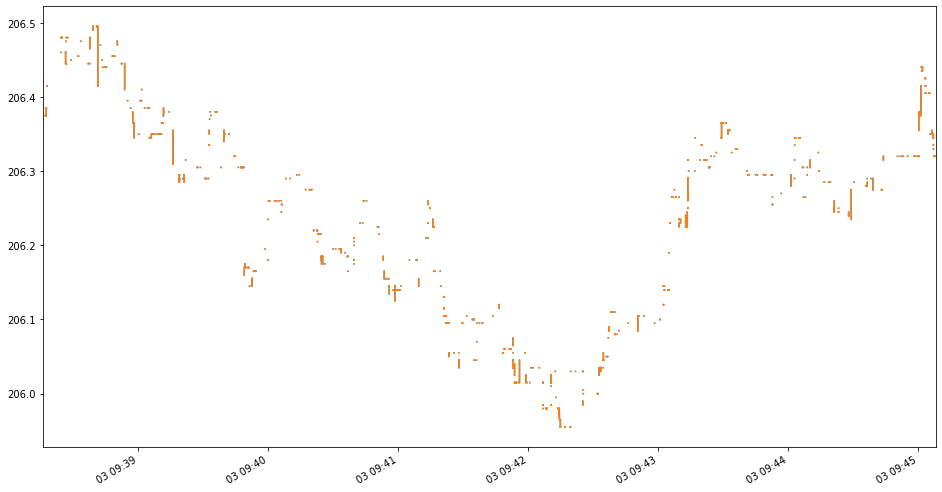

In [305]:
results1['midpoints'].plot()
results1['fair_values'].plot()

In [8]:
trades = results1['trades']
trades.loc[trades['trade_type']=='Pas']

,trade_px,last_price,fair_value,ave_price,order_quantity,order_side,position,real_pnl,unreal_pnl,trade_type


In [307]:
trades 

,trade_px,last_price,fair_value,ave_price,order_quantity,order_side,position,real_pnl,unreal_pnl,trade_type
2019-09-03 09:38:16.858990497,206.385,206.385,206.37,206.385,1,b,1,0,-0.015,Pas
2019-09-03 09:38:17.292602798,206.375,206.375,206.36,206.38,1,b,2,0,-0.04,Pas
2019-09-03 09:38:17.311745652,206.375,206.375,206.356,206.378,1,b,3,0,-0.0661,Pas
2019-09-03 09:38:17.694703453,206.375,206.375,206.37,206.377,1,b,4,0,-0.03,Pas
2019-09-03 09:38:17.694812236,206.375,206.375,206.37,206.377,1,b,5,0,-0.035,Pas
2019-09-03 09:38:17.695099284,206.375,206.375,206.37,206.377,1,b,6,0,-0.04,Pas
2019-09-03 09:38:17.695330214,206.375,206.375,206.37,206.376,1,b,7,0,-0.045,Pas
2019-09-03 09:38:17.695935408,206.375,206.375,206.37,206.376,1,b,8,0,-0.05,Pas
2019-09-03 09:38:17.702094072,206.375,206.375,206.37,206.376,1,b,9,0,-0.055,Pas
2019-09-03 09:38:17.812922256,206.385,206.385,206.37,206.377,1,b,10,0,-0.07,Pas


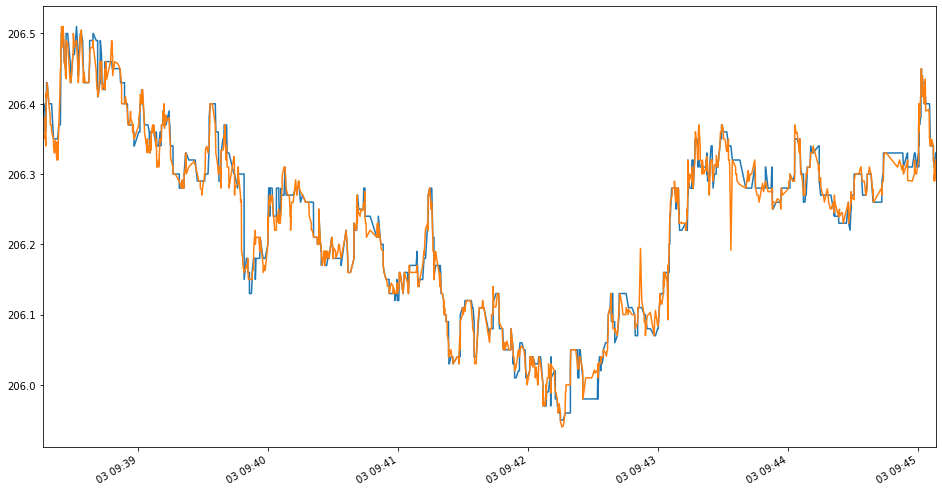

In [9]:
trades['trade_px'].plot()
trades[' fair_value'].plot()

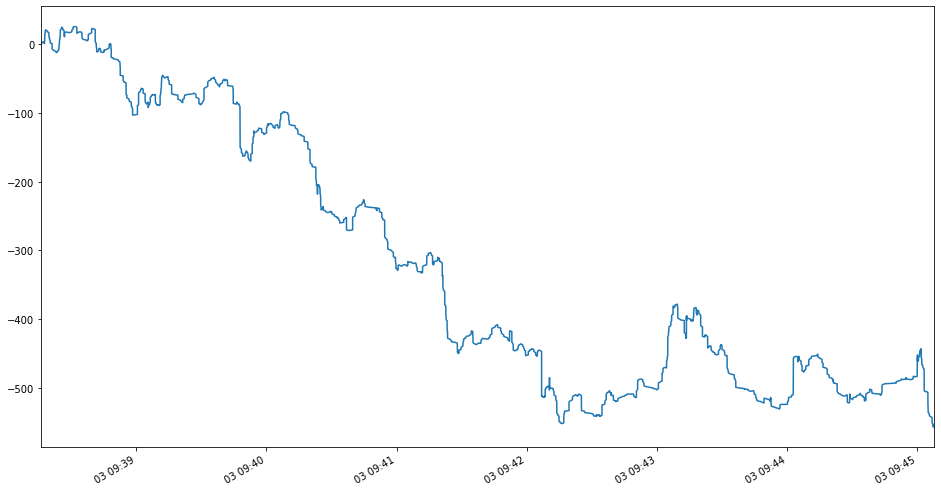

In [10]:
trades['position'].plot()

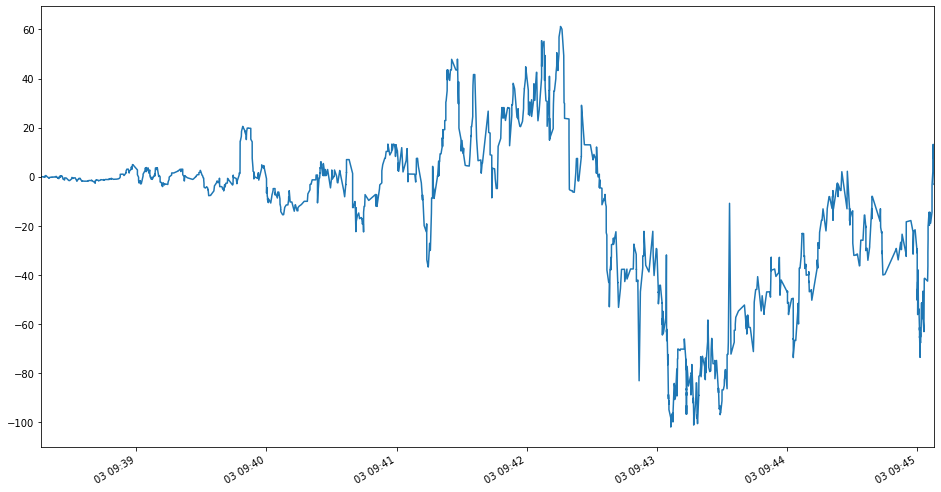

In [11]:
(trades['real_pnl']+trades['unreal_pnl']).plot()

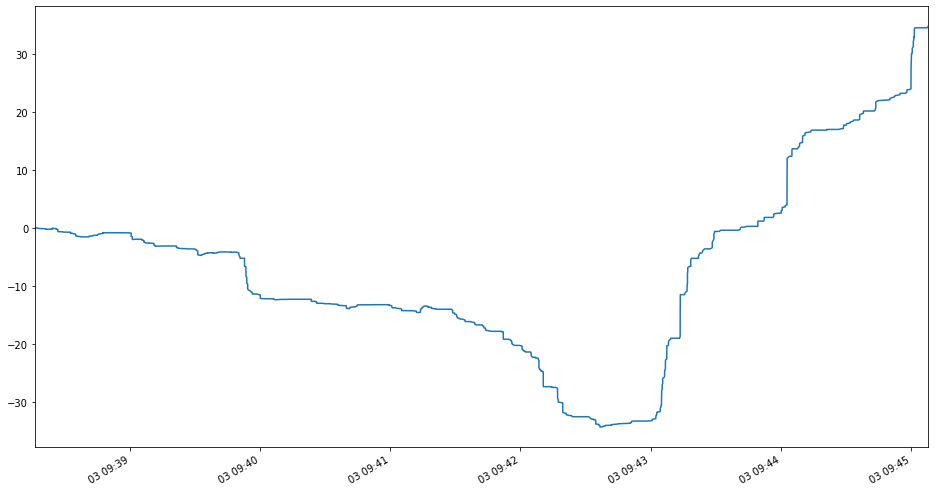

In [12]:
trades['real_pnl'].plot()

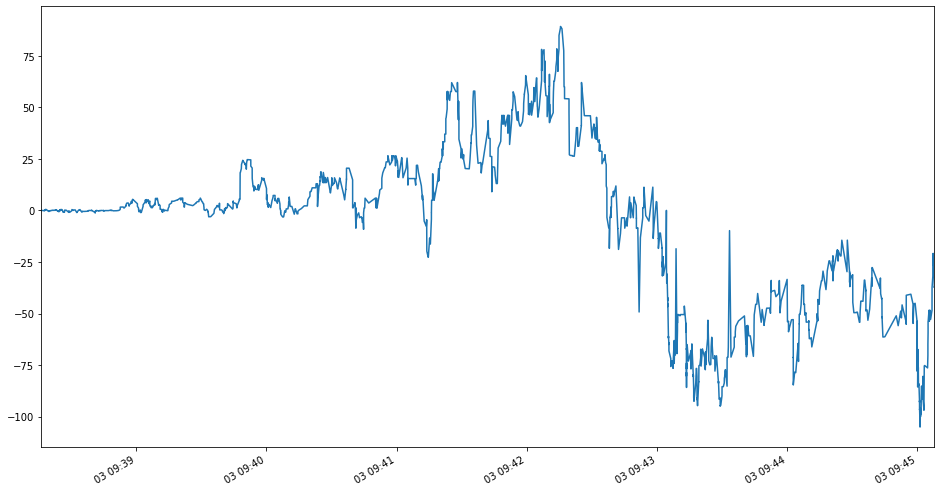

In [264]:
trades['unreal_pnl'].plot()

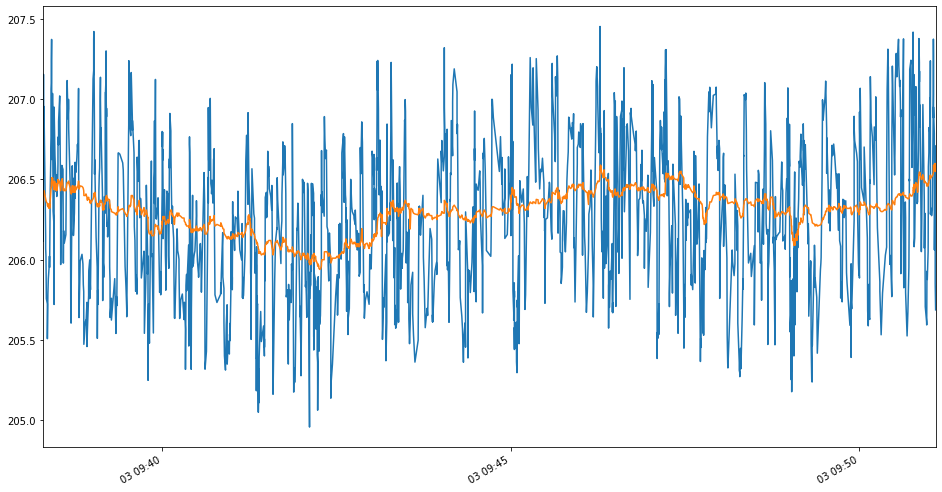

In [113]:
results['fair_value'].plot()
results['market_price'].plot()
plt.show()

## 2. Output

In [114]:
statistical_results = tk.trade_statistics( results )

In [115]:
# P&L Series

intraday_pnl = statistical_results['PNL']
intraday_pnl

,position,unrealized_pnl,realized_pnl
2019-09-03 09:38:17.244698778,1,-0.01,0
2019-09-03 09:38:17.293535447,2,-0.06,0
2019-09-03 09:38:17.311745652,1,-0.0337,-0.03
2019-09-03 09:38:17.511901738,0,-0,-0.06
2019-09-03 09:38:17.596473049,-1,0.02,-0.06
...,...,...,...
2019-09-03 09:51:05.611013099,-93,-25.5729,91.55
2019-09-03 09:51:05.613221350,-94,-27.889,91.55
2019-09-03 09:51:05.614219472,-95,-27.6361,91.55
2019-09-03 09:51:05.614281174,-96,-27.3716,91.55


In [116]:
# max Long, max Short, Ending Position
# Final, Max, Min P&L

for key in list(statistical_results.keys())[1:]:
    print(key , ':' , statistical_results[key])

max_long_Position : 22
max_short_Position : -150
ending_Position : -97
best_unrealized_PNL : 25.278118336434375
worst_unrealized_PNL : -27.88900725702871
total_realized_PNL : 91.54999018074372


## 3. Explore Different Calibrations

## 4. Risk Adjustment